In [71]:
import import_ipynb
import numpy as np
import pandas as pd
import networkx as nx 

import seaborn as sns

import glob
import numpy as np
import imageio
import os

import itertools
import copy
from itertools import chain
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# -*- coding: utf-8 -*-
#
#    Copyright (C) 2010 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.
#
# Authors:
#   Nima Mohammadi <nima.irt@gmail.com>
#   Aric Hagberg <hagberg@lanl.gov>
#   Mike Trenfield <william.trenfield@utsouthwestern.edu>
"""
Eulerian circuits and graphs.
"""
from itertools import combinations

import networkx as nx

In [2]:
# This is a practice graph for debugging.

Z=nx.Graph()
vertices=['a','b','c','d','e','f','g', 'h', 'k', 'l']

edges=[('a', 'd'), ('g', 'f'), ('c', 'f'), ('b', 'h'), ('k', 'l'), ('h', 'k'), ('h', 'l'),('e', 'a'), ('a', 'b'),('f', 'h'), ('b','c'), ('b','d'), ('a', 'c'), ('c', 'd'), ('d', 'f'), ('e', 'g')]

colors=np.array([x,(0.2, 0.4, 0.4)] for x in edges)
# Nodes and edges are added to the graph. 

Z.add_nodes_from(vertices)
Z.add_edges_from(edges)

# Dictionaries providing length of each edge and number of pickups along each edge are given as lists K, T.
# The library U is needed for technical reasons in the algorithm.  It assigns to each edge the label 'Existing'.

#KZ = {('l', 'k'): 100,('h', 'k'): 100, ('h', 'l'): 100,('f', 'h'): 100, ('f', 'j'): 100, ('e', 'a'): 123, ('a', 'b'): 200,('b', 'c'): 200, ('b','d'):196, ('a', 'c'):215, ('c', 'd'):160, ('d', 'f'):224, ('e', 'g'):209, ('f', 'g'):229}    
#TZ = {('l', 'k'): 7, ('h', 'k'): 7, ('h', 'l'): 8,('f', 'h'): 10, ('f', 'j'): 10,('e', 'a'):4, ('a', 'b'):6, ('b','d'):5, ('a', 'c'):12,('b', 'c'): 12, ('c', 'd'):11, ('d', 'f'):10, ('e', 'g'):0, ('f', 'g'):0}
#TZ2 = {list(TZ.keys())[i]: (TZ[list(TZ.keys())[i]], [ (list(TZ.keys())[i][0], list(TZ.keys())[i][1]), 2] , \
#                            [ (list(TZ.keys())[i][1], list(TZ.keys())[i][0]),  TZ[list(TZ.keys())[i]] - 2])  \
#                            for i in range(len(list(TZ.keys())))}

#UZ = {x: 'Existing' for x in edges}
#UD = {edges[i]: False for i in range(len(edges))}
#UD = TZ = {('l', 'k'): True,('h', 'k'): True, ('h', 'l'): False,('f', 'h'): False, ('f', 'j'): True, \
#           ('e', 'a'): False, ('a', 'b'):False, ('b','d'):True, ('a', 'c'):False,  \
#           ('b', 'c'): False, ('c', 'd'):True, ('d', 'f'):True, ('e', 'g'):True, ('f', 'g'):True}


#UC = {edges[i]: 'b' for i in range(len(edges))}
# Attributes provided above are assigned to the graph.



#nx.set_edge_attributes(Z, KZ, name='distance')
#nx.set_edge_attributes(Z, TZ2, name='pickups')
#nx.set_edge_attributes(Z, UZ, name='edgestatus')
#nx.set_edge_attributes(Z, UD, name='divided')
#nx.set_edge_attributes(Z, UC, name='colors')
#divided_roads=[Z[u][v]['divided'] for u,v in edges]
#coloring=['red' if i==True else 'black' for i in divided_roads]

# Cartesian coordinates are provided for each node. 
node_positions_Z = {'k': (16, 12), 'l': (20,12), 'a': (6,6), 'b':(10,9), 'c':(10,3), 'd':(14,6), 'e':(2,6), 'f':(18,6), 'g':(10,1), 'h':(18, 9)}
nx.set_node_attributes(Z, node_positions_Z, 'position')

In [3]:
def is_bridge(G, edge):
    if (edge[1], edge[0]) in list(nx.bridges(G)):
        return True
    elif (edge[0], edge[1]) in list(nx.bridges(G)):
        return True
    else: 
        return False

In [4]:
# This is a practice graph for debugging.

B=nx.Graph()
vertices=['a','b','c','d','e','g']

edges=[('e','c'), ('e', 'b'), ('e', 'a'), ('e', 'g')]

colors=np.array([x,(0.2, 0.4, 0.4)] for x in edges)
# Nodes and edges are added to the graph. 

B.add_nodes_from(vertices)
B.add_edges_from(edges)

node_positions_B = {'a': (6,6), 'b':(10,9), 'c':(10,3), 'd':(14,6), 'e':(2,6),  'g':(10,1)}
nx.set_node_attributes(B, node_positions_B, 'position')

In [5]:
# This is a practice graph for debugging.

W=nx.Graph()
vertices=['a','b','c','d','e','g']

edges=[('g', 'd'),('e','c'), ('e', 'b'), ('a', 'd'),('e', 'a'), ('a', 'b'), ('b','c'), ('b','d'), ('a', 'c'), ('c', 'd'), ('e', 'g')]

colors=np.array([x,(0.2, 0.4, 0.4)] for x in edges)
# Nodes and edges are added to the graph. 

W.add_nodes_from(vertices)
W.add_edges_from(edges)

node_positions_W = {'a': (6,6), 'b':(10,9), 'c':(10,3), 'd':(14,6), 'e':(2,6),  'g':(10,1)}
nx.set_node_attributes(W, node_positions_Z, 'position')

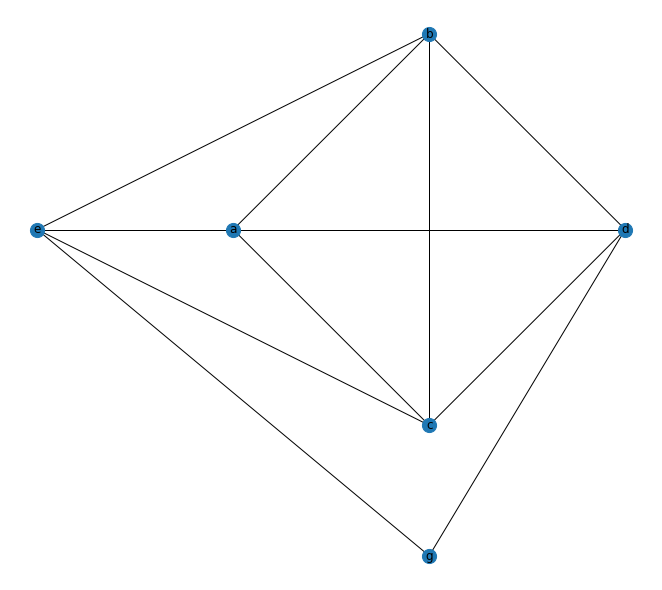

In [6]:
plt.figure(figsize=(9,8))
nx.draw(W, pos=nx.get_node_attributes(W, 'position'), node_size=200, with_labels = True)

In [7]:
# This is a practice graph for debugging.

W2=nx.Graph()
vertices=['a','b','c','d','e','f', 'g']

edges=[('e','c'), ('a','g'), ('d','g'),('a', 'f'), ('d', 'f'), ('b', 'f'), ('f', 'c'),('b', 'e'), ('c', 'd'), ('b', 'd'), ('a', 'b'), ('a', 'c')]

colors=np.array([x,(0.2, 0.4, 0.4)] for x in edges)
# Nodes and edges are added to the graph. 

W2.add_nodes_from(vertices)
W2.add_edges_from(edges)

node_positions_W2 = {'a': (6,6), 'b':(10,9), 'c':(10,3), 'd':(14,6), 'e':(2,6),  'g':(14,3), 'f':(10,6)}
nx.set_node_attributes(W2, node_positions_W2, 'position')

In [8]:
# This is a practice graph for debugging.

W3=nx.Graph()
vertices=['a','b','c','d','e']

edges=[('e','c'),('b','c'),('b', 'e'), ('c', 'd'), ('b', 'd'), ('a', 'b'), ('a', 'c')]

colors=np.array([x,(0.2, 0.4, 0.4)] for x in edges)
# Nodes and edges are added to the graph. 

W3.add_nodes_from(vertices)
W3.add_edges_from(edges)

node_positions_W3 = {'a': (6,6), 'b':(10,9), 'c':(10,3), 'd':(14,6), 'e':(2,6),  'g':(14,3), 'f':(10,6)}
nx.set_node_attributes(W3, node_positions_W3, 'position')

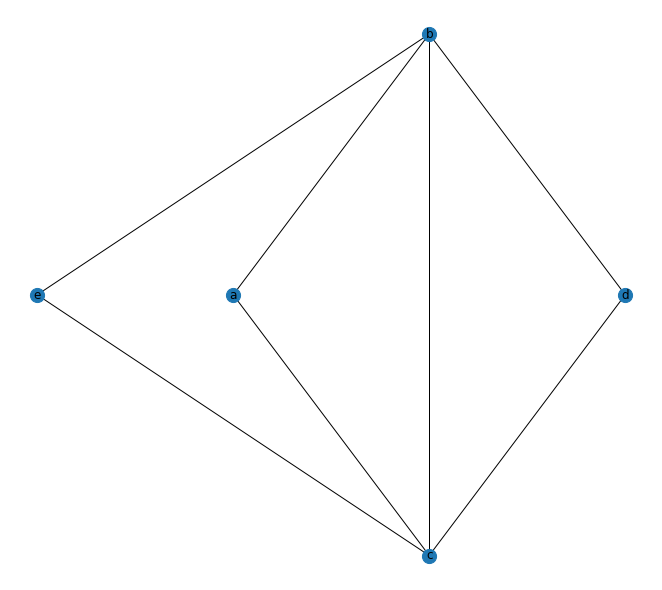

In [9]:
plt.figure(figsize=(9,8))
nx.draw(W3, pos=nx.get_node_attributes(W3, 'position'), node_size=200, with_labels = True)

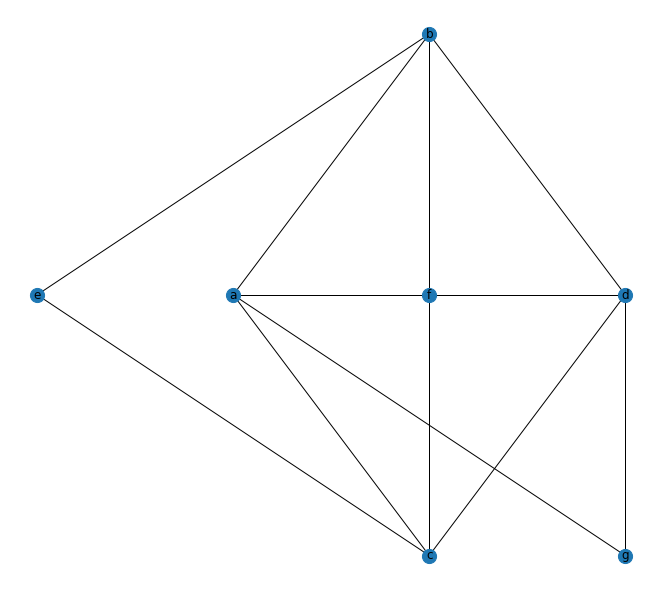

In [11]:
plt.figure(figsize=(9,8))
nx.draw(W2, pos=nx.get_node_attributes(W2, 'position'), node_size=200, with_labels = True)

In [35]:
def cyclic_list(p):                                       # For a path p (written as an ordered list of vertices),
    l=[p]                                                 # this returns the list of all cyclic permutations of p,
    for i in range(1, len(p)-1):                          # not including p.
        q=[p[(t+i)%len(p)] for t in range(len(p))]
        l=l+[q]
    return l


def prune_cycles(L):                                      # This removes all all cyclic permutations of elements 
    for x in L:                                           # in L, so that no two elements if prune_cycles(L) are 
        for y in [z for z in L if z != x]:                # cyclic permutations of one another.
            if x in cyclic_list(y):      
                L.remove(y)
    return L


def fleury(G, pathset):
    if type(pathset)==str:
        pathset=[[pathset]]

    if len(pathset[0])==len(G.edges):
        return pathset
    else:
        L = range(len(pathset))
        for i in range(len(pathset)):

            G0=G.copy()
            remove_edgeset=[(pathset[i][j], pathset[i][j+1]) for j in range(len(pathset[i])-1)]
            G0.remove_edges_from(remove_edgeset)
                # Next find the set A of all admissible adjacent nodes to the
                # last element pathset[i][-1] of pathset[i].  If there are edges adjacent to 
                # pathset[i] that are not bridges, these are 
                # all of the admissible edges.  If there are only bridges adjacent to 
                #, these are the admissible edges.
            if all(is_bridge(G0,x) for x in G0.edges(pathset[i][-1])):
                A = G0.neighbors(pathset[i][-1])
            else:
                A = [x for x in G0.neighbors(pathset[i][-1]) if\
                                        (pathset[i][-1], x) not in list(nx.bridges(G0)) \
                                        and (x, pathset[i][-1]) not in list(nx.bridges(G0))\
                                        ]
                # replace the path p=[v0, v1, ..., vk] with a set of m new paths
                # [ [v0, ..., vk, u1], [v0, ..., vk, u2], ...., [v0, ..., vk, um]],
                # where u1, ..., um is the set of nodes A.
                # Then replace p with the nested set 
                # [ [v0, ..., vk, u1], [v0, ..., vk, u2], ...., [v0, ..., vk, um]]. 

            pathset[i] = [pathset[i]+[x] for x in A]           

        L=prune_cycles(fleury(G, [y for x in pathset for y in x]))
        return L

def fleury2(G, v):
    L = fleury(G,v)
    M=[x+[v] for x in L]
    return M

In [146]:
def edge_ratio(G, edge):
    r=G.edges[edge]['pickups'][0]/G.edges[edge]['distance']
    return r

def min_edge(G,L):
    M= sorted(L, key=lambda p: edge_ratio(G,p), reverse = False)
    return M[0]

def min_neighbor(G,v,S):
    M=sorted(S, key=lambda p: edge_ratio(G,(v,p)), reverse=False)
    return M[0]

def fleury_min(G,path):
    #First we find the collection of all edges adjacent to v.
    G0=G.copy()
    while len(path)<len(G.edges)+1:
        remove_edgeset=[(path[j], path[j+1]) for j in range(len(path)-1)]
        G0.remove_edges_from(remove_edgeset)
                    # Next find the set A of all admissible adjacent nodes to the
                    # last element pathset[i][-1] of pathset[i].  If there are edges adjacent to 
                    # pathset[i] that are not bridges, these are 
                    # all of the admissible edges.  If there are only bridges adjacent to 
                    #, these are the admissible edges.
        if all(is_bridge(G0,x) for x in G0.edges(path[-1])):
            A = G0.neighbors(path[-1])
        else:
            A = [x for x in G0.neighbors(path[-1]) if\
                                            (path[-1], x) not in list(nx.bridges(G0)) \
                                            and (x, path[-1]) not in list(nx.bridges(G0))\
                                            ]
                    # replace the path p=[v0, v1, ..., vk] with a set of m new paths
                    # [ [v0, ..., vk, u1], [v0, ..., vk, u2], ...., [v0, ..., vk, um]],
                    # where u1, ..., um is the set of nodes A.
                    # Then replace p with the nested set 
                    # [ [v0, ..., vk, u1], [v0, ..., vk, u2], ...., [v0, ..., vk, um]]. 
        path=path+[min_neighbor(G0, path[-1], A)]
    return path   


    

In [147]:
fleury_min(Z, ['e'])

['e', 'g', 'f', 'c', 'a', 'b', 'd', 'f', 'b', 'c', 'd', 'a', 'e']

In [149]:
cost_path2(Z, fleury_min(Z, ['e']))

56987.5

In [36]:
fleury2(W2, 'a')

[['a', 'g', 'd', 'b', 'a', 'f', 'b', 'e', 'c', 'f', 'd', 'c', 'a'],
 ['a', 'g', 'd', 'b', 'a', 'f', 'b', 'e', 'c', 'd', 'f', 'c', 'a'],
 ['a', 'g', 'd', 'b', 'a', 'f', 'c', 'e', 'b', 'f', 'd', 'c', 'a'],
 ['a', 'g', 'd', 'b', 'a', 'f', 'c', 'd', 'f', 'b', 'e', 'c', 'a'],
 ['a', 'g', 'd', 'b', 'a', 'f', 'd', 'c', 'e', 'b', 'f', 'c', 'a'],
 ['a', 'g', 'd', 'b', 'a', 'f', 'd', 'c', 'f', 'b', 'e', 'c', 'a'],
 ['a', 'g', 'd', 'b', 'a', 'c', 'e', 'b', 'f', 'c', 'd', 'f', 'a'],
 ['a', 'g', 'd', 'b', 'a', 'c', 'e', 'b', 'f', 'd', 'c', 'f', 'a'],
 ['a', 'g', 'd', 'b', 'a', 'c', 'f', 'b', 'e', 'c', 'd', 'f', 'a'],
 ['a', 'g', 'd', 'b', 'a', 'c', 'f', 'd', 'c', 'e', 'b', 'f', 'a'],
 ['a', 'g', 'd', 'b', 'a', 'c', 'd', 'f', 'b', 'e', 'c', 'f', 'a'],
 ['a', 'g', 'd', 'b', 'a', 'c', 'd', 'f', 'c', 'e', 'b', 'f', 'a'],
 ['a', 'g', 'd', 'b', 'f', 'a', 'b', 'e', 'c', 'f', 'd', 'c', 'a'],
 ['a', 'g', 'd', 'b', 'f', 'a', 'b', 'e', 'c', 'd', 'f', 'c', 'a'],
 ['a', 'g', 'd', 'b', 'f', 'a', 'c', 'f', 'd', '

In [34]:
len(fleury(W2, 'a'))

264

# This is the implimentation of TRZ 5 - Wednesday. 

In [111]:
#trz5_wed

B=nx.Graph()
 
# Node and edge sets are given here: 

trz5_wed_vertices=[ 'B1' , 'B2' , 'B3' , 'B4' , 'B5' , 'B6' , 'B7' , 'B8' , 'B9' , 'B10' , 'B11' , 'B12' , 'B13' , 'B14' , 'B15' , 'B16' , 'B17' , 'B18' , 'B19' , 'B20' , 'B21' , 'B22' , 'B23' , 'B24' , 'B25' , 'B26' , 'B27' , 'B28' , 'B29' , 'B30' , 'B31' , 'B32' , 'B33' , 'B34' , 'B35' , 'B36' , 'B37' , 'B38' , 'B39' , 'B40' , 'B41' , 'B42' , 'B43' , 'B44' , 'B45' , 'B46' , 'B47' , 'B48' , 'B49' , 'B50' , 'B51' , 'B52' , 'B53' , 'B54' , 'B55' , 'B56' , 'B57' , 'B58' , 'B59' , 'B60' , 'B61' , 'B62' , 'B63' , 'B64' , 'B65' , 'B66' , 'B67' , 'B68' , 'B69' , 'B70' , 'B71' , 'B72' , 'B73' , 'B74' , 'B75' , 'B76' , 'B77' , 'B82' , 'B83' , 'B84' , 'B85' , 'B86' , 'B87' , 'B88' , 'B89' , 'B90' , 'B91' , 'B92' , 'B93' , 'B94' , 'B95' , 'B96' , 'B97' , 'B98' , 'B99' , 'B100' , 'B101' , 'B102' , 'B103' , 'B104' , 'B105' , 'B106' , 'B107' , 'B108' , 'B109' , 'B110' , 'B111' , 'B112' , 'B113' ]
trz5_wed_edges=[('B1','B2'),('B2','B3'),('B3','B5'),('B3','B4'),('B4','B6'),('B6','B7'),('B6','B8'),('B4','B9'),('B9','B4'),('B2','B11'),('B11','B10'),('B11','B12'),('B12','B13'),('B12','B47'),('B47','B14'),('B14','B15'),('B14','B16'),('B47','B18'),('B18','B17'),('B18','B19'),('B19','B20'),('B19','B21'),('B21','B22'),('B21','B23'),('B47','B24'),('B24','B25'),('B24','B26'),('B26','B27'),('B26','B28'),('B26','B29'),('B24','B30'),('B30','B31'),('B31','B32'),('B31','B33'),('B33','B34'),('B33','B35'),('B35','B36'),('B36','B37'),('B36','B38'),('B38','B39'),('B38','B40'),('B35','B41'),('B41','B42'),('B41','B43'),('B43','B46'),('B46','B44'),('B46','B45'),('B35','B49'),('B49','B50'),('B49','B51'),('B51','B52'),('B51','B53'),('B53','B54'),('B54','B55'),('B54','B57'),('B54','B56'),('B53','B58'),('B58','B59'),('B58','B60'),('B60','B48'),('B60','B31'),('B30','B61'),('B61','B62'),('B61','B63'),('B61','B64'),('B64','B65'),('B64','B66'),('B64','B67'),('B67','B68'),('B68','B69'),('B68','B70'),('B70','B71'),('B70','B72'),('B72','B73'),('B73','B74'),('B73','B75'),('B75','B76'),('B75','B77'),('B72','B82'),('B82','B83'),('B83','B84'),('B83','B85'),('B85','B86'),('B85','B87'),('B87','B88'),('B87','B89'),('B89','B67'),('B89','B90'),('B90','B91'),('B91','B92'),('B91','B93'),('B90','B94'),('B82','B95'),('B95','B96'),('B95','B97'),('B97','B98'),('B97','B99'),('B97','B100'),('B100','B101'),('B101','B102'),('B101','B103'),('B103','B104'),('B103','B105'),('B105','B106'),('B105','B107'),('B100','B108'),('B108','B109'),('B108','B110'),('B108','B111'),('B111','B112'),('B111','B113')]

# Nodes and edges are added to the graph. 

B.add_nodes_from(trz5_wed_vertices)
B.add_edges_from(trz5_wed_edges)


# Dictionaries providing length of each edge and number of pickups along each edge are given as lists K, T.
# The library U is needed for technical reasons in the algorithm.  It assigns to each edge the label 'Existing'.

K = {('B1','B2'):413,('B2','B3'):177,('B3','B5'):390,('B3','B4'):400,('B4','B6'):423,('B6','B7'):138,('B6','B8'):381,('B4','B9'):1122,('B9','B4'):1122,('B2','B11'):912,('B11','B10'):358,('B11','B12'):2112,('B12','B13'):981,('B12','B47'):2022,('B47','B14'):223,('B14','B15'):266,('B14','B16'):1004,('B47','B18'):646,('B18','B17'):499,('B18','B19'):285,('B19','B20'):348,('B19','B21'):531,('B21','B22'):240,('B21','B23'):210,('B47','B24'):955,('B24','B25'):351,('B24','B26'):344,('B26','B27'):364,('B26','B28'):213,('B26','B29'):600,('B24','B30'):600,('B30','B31'):814,('B31','B32'):223,('B31','B33'):325,('B33','B34'):223,('B33','B35'):253,('B35','B36'):558,('B36','B37'):358,('B36','B38'):318,('B38','B39'):315,('B38','B40'):558,('B35','B41'):495,('B41','B42'):358,('B41','B43'):1142,('B43','B46'):308,('B46','B44'):213,('B46','B45'):285,('B35','B49'):502,('B49','B50'):344,('B49','B51'):367,('B51','B52'):180,('B51','B53'):236,('B53','B54'):574,('B54','B55'):207,('B54','B57'):197,('B54','B56'):276,('B53','B58'):210,('B58','B59'):148,('B58','B60'):764,('B60','B48'):203,('B60','B31'):253,('B30','B61'):253,('B61','B62'):279,('B61','B63'):466,('B61','B64'):476,('B64','B65'):184,('B64','B66'):440,('B64','B67'):404,('B67','B68'):531,('B68','B69'):302,('B68','B70'):518,('B70','B71'):528,('B70','B72'):440,('B72','B73'):322,('B73','B74'):646,('B73','B75'):223,('B75','B76'):331,('B75','B77'):364,('B72','B82'):1441,('B82','B83'):285,('B83','B84'):213,('B83','B85'):443,('B85','B86'):443,('B85','B87'):554,('B87','B88'):410,('B87','B89'):259,('B89','B67'):282,('B89','B90'):407,('B90','B91'):253,('B91','B92'):144,('B91','B93'):495,('B90','B94'):879,('B82','B95'):226,('B95','B96'):1441,('B95','B97'):440,('B97','B98'):197,('B97','B99'):180,('B97','B100'):335,('B100','B101'):226,('B101','B102'):249,('B101','B103'):348,('B103','B104'):285,('B103','B105'):279,('B105','B106'):272,('B105','B107'):591,('B100','B108'):535,('B108','B109'):217,('B108','B110'):187,('B108','B111'):358,('B111','B112'):351,('B111','B113'):240}
T = {('B1','B2'): 1,('B2','B3'): 1,('B3','B5'): 7,('B3','B4'): 3,('B4','B6'): 5,('B6','B7'): 2,('B6','B8'): 7,('B4','B9'): 4,('B9','B4'): 4,('B2','B11'): 5,('B11','B10'): 10,('B11','B12'): 20,('B12','B13'): 8,('B12','B47'): 2,('B47','B14'): 0,('B14','B15'): 20,('B14','B16'): 63,('B47','B18'): 10,('B18','B17'): 15,('B18','B19'): 3,('B19','B20'): 11,('B19','B21'): 7,('B21','B22'): 9,('B21','B23'): 9,('B47','B24'): 0,('B24','B25'): 11,('B24','B26'): 4,('B26','B27'): 12,('B26','B28'): 5,('B26','B29'): 19,('B24','B30'): 0,('B30','B31'): 0,('B31','B32'): 24,('B31','B33'): 0,('B33','B34'): 17,('B33','B35'): 0,('B35','B36'): 5,('B36','B37'): 37,('B36','B38'): 12,('B38','B39'): 32,('B38','B40'): 45,('B35','B41'): 0,('B41','B42'): 43,('B41','B43'): 0,('B43','B46'): 13,('B46','B44'): 34,('B46','B45'): 23,('B35','B49'): 7,('B49','B50'): 8,('B49','B51'): 7,('B51','B52'): 3,('B51','B53'): 1,('B53','B54'): 2,('B54','B55'): 5,('B54','B57'): 5,('B54','B56'): 5,('B53','B58'): 1,('B58','B59'): 8,('B58','B60'): 22,('B60','B48'): 10,('B60','B31'): 5,('B30','B61'): 0,('B61','B62'): 10,('B61','B63'): 12,('B61','B64'): 0,('B64','B65'): 8,('B64','B66'): 7,('B64','B67'): 0,('B67','B68'): 10,('B68','B69'): 13,('B68','B70'): 4,('B70','B71'): 15,('B70','B72'): 9,('B72','B73'): 4,('B73','B74'): 17,('B73','B75'): 2,('B75','B76'): 9,('B75','B77'): 10,('B72','B82'): 23,('B82','B83'): 0,('B83','B84'): 9,('B83','B85'): 0,('B85','B86'): 14,('B85','B87'): 0,('B87','B88'): 14,('B87','B89'): 0,('B89','B67'): 0,('B89','B90'): 7,('B90','B91'): 1,('B91','B92'): 7,('B91','B93'): 13,('B90','B94'): 27,('B82','B95'): 0,('B95','B96'): 39,('B95','B97'): 0,('B97','B98'): 9,('B97','B99'): 6,('B97','B100'): 0,('B100','B101'): 3,('B101','B102'): 8,('B101','B103'): 3,('B103','B104'): 9,('B103','B105'): 1,('B105','B106'): 10,('B105','B107'): 17,('B100','B108'): 8,('B108','B109'): 8,('B108','B110'): 5,('B108','B111'): 1,('B111','B112'): 11,('B111','B113'): 9}
T2 = {('B1','B2'):  ( 1 ,  [ ('B1','B2') , 1] , [ ('B2','B1') , 0 ] ) ,('B2','B3'):  ( 1 ,  [ ('B2','B3') , 1] , [ ('B3','B2') , 0 ] ) ,('B3','B4'):  ( 3 ,  [ ('B3','B4') , 3] , [ ('B4','B3') , 1 ] ) ,('B3','B5'):  ( 7 ,  [ ('B3','B5') , 3] , [ ('B5','B3') , 1 ] ) ,('B4','B6'):  ( 5 ,  [ ('B4','B6') , 5] , [ ('B6','B4') , 0 ] ) ,('B6','B7'):  ( 2 ,  [ ('B6','B7') , 2] , [ ('B7','B6') , 0 ] ) ,('B6','B8'):  ( 7 ,  [ ('B6','B8') , 7] , [ ('B8','B6') , 0 ] ) ,('B4','B9'):  ( 4 ,  [ ('B4','B9') , 4] , [ ('B9','B4') , 4 ] ) ,('B2','B11'):  ( 5 ,  [ ('B2','B11') , 5] , [ ('B11','B2') , 0 ] ) ,('B11','B10'):  ( 10 ,  [ ('B11','B10') , 10] , [ ('B10','B11') , 0 ] ) ,('B11','B12'):  ( 20 ,  [ ('B11','B12') , 20] , [ ('B12','B11') , 0 ] ) ,('B12','B13'):  ( 8 ,  [ ('B12','B13') , 8] , [ ('B13','B12') , 0 ] ) ,('B12','B47'):  ( 2 ,  [ ('B12','B47') , 2] , [ ('B47','B12') , 0 ] ) ,('B47','B14'):  ( 0 ,  [ ('B47','B14') , 0] , [ ('B14','B47') , 0 ] ) ,('B14','B15'):  ( 20 ,  [ ('B14','B15') , 20] , [ ('B15','B14') , 0 ] ) ,('B14','B16'):  ( 63 ,  [ ('B14','B16') , 63] , [ ('B16','B14') , 0 ] ) ,('B47','B18'):  ( 10 ,  [ ('B47','B18') , 10] , [ ('B18','B47') , 0 ] ) ,('B18','B17'):  ( 15 ,  [ ('B18','B17') , 15] , [ ('B17','B18') , 0 ] ) ,('B18','B19'):  ( 3 ,  [ ('B18','B19') , 3] , [ ('B19','B18') , 0 ] ) ,('B19','B20'):  ( 11 ,  [ ('B19','B20') , 11] , [ ('B20','B19') , 0 ] ) ,('B19','B21'):  ( 7 ,  [ ('B19','B21') , 7] , [ ('B21','B19') , 0 ] ) ,('B21','B22'):  ( 9 ,  [ ('B21','B22') , 9] , [ ('B22','B21') , 0 ] ) ,('B21','B23'):  ( 9 ,  [ ('B21','B23') , 9] , [ ('B23','B21') , 0 ] ) ,('B47','B24'):  ( 0 ,  [ ('B47','B24') , 0] , [ ('B24','B47') , 0 ] ) ,('B24','B25'):  ( 11 ,  [ ('B24','B25') , 11] , [ ('B25','B24') , 0 ] ) ,('B24','B26'):  ( 4 ,  [ ('B24','B26') , 4] , [ ('B26','B24') , 0 ] ) ,('B26','B27'):  ( 12 ,  [ ('B26','B27') , 12] , [ ('B27','B26') , 0 ] ) ,('B26','B28'):  ( 5 ,  [ ('B26','B28') , 5] , [ ('B28','B26') , 0 ] ) ,('B26','B29'):  ( 19 ,  [ ('B26','B29') , 19] , [ ('B29','B26') , 0 ] ) ,('B24','B30'):  ( 0 ,  [ ('B24','B30') , 0] , [ ('B30','B24') , 0 ] ) ,('B30','B31'):  ( 1 ,  [ ('B30','B31') , 0] , [ ('B31','B30') , 0 ] ) ,('B31','B32'):  ( 24 ,  [ ('B31','B32') , 24] , [ ('B32','B31') , 0 ] ) ,('B31','B33'):  ( 0 ,  [ ('B31','B33') , 0] , [ ('B33','B31') , 0 ] ) ,('B33','B34'):  ( 17 ,  [ ('B33','B34') , 17] , [ ('B34','B33') , 0 ] ) ,('B33','B35'):  ( 0 ,  [ ('B33','B35') , 0] , [ ('B35','B33') , 0 ] ) ,('B35','B36'):  ( 5 ,  [ ('B35','B36') , 5] , [ ('B36','B35') , 0 ] ) ,('B36','B37'):  ( 37 ,  [ ('B36','B37') , 37] , [ ('B37','B36') , 0 ] ) ,('B36','B38'):  ( 12 ,  [ ('B36','B38') , 12] , [ ('B38','B36') , 0 ] ) ,('B38','B39'):  ( 32 ,  [ ('B38','B39') , 32] , [ ('B39','B38') , 0 ] ) ,('B38','B40'):  ( 45 ,  [ ('B38','B40') , 45] , [ ('B40','B38') , 0 ] ) ,('B35','B41'):  ( 0 ,  [ ('B35','B41') , 0] , [ ('B41','B35') , 0 ] ) ,('B41','B42'):  ( 43 ,  [ ('B41','B42') , 43] , [ ('B42','B41') , 0 ] ) ,('B41','B43'):  ( 0 ,  [ ('B41','B43') , 0] , [ ('B43','B41') , 0 ] ) ,('B43','B46'):  ( 13 ,  [ ('B43','B46') , 13] , [ ('B46','B43') , 0 ] ) ,('B46','B44'):  ( 34 ,  [ ('B46','B44') , 34] , [ ('B44','B46') , 0 ] ) ,('B46','B45'):  ( 23 ,  [ ('B46','B45') , 23] , [ ('B45','B46') , 0 ] ) ,('B35','B49'):  ( 7 ,  [ ('B35','B49') , 7] , [ ('B49','B35') , 0 ] ) ,('B49','B50'):  ( 8 ,  [ ('B49','B50') , 8] , [ ('B50','B49') , 0 ] ) ,('B49','B51'):  ( 7 ,  [ ('B49','B51') , 7] , [ ('B51','B49') , 0 ] ) ,('B51','B52'):  ( 3 ,  [ ('B51','B52') , 3] , [ ('B52','B51') , 0 ] ) ,('B51','B53'):  ( 1 ,  [ ('B51','B53') , 1] , [ ('B53','B51') , 0 ] ) ,('B53','B54'):  ( 2 ,  [ ('B53','B54') , 2] , [ ('B54','B53') , 0 ] ) ,('B54','B55'):  ( 5 ,  [ ('B54','B55') , 5] , [ ('B55','B54') , 0 ] ) ,('B54','B57'):  ( 5 ,  [ ('B54','B57') , 5] , [ ('B57','B54') , 0 ] ) ,('B54','B56'):  ( 5 ,  [ ('B54','B56') , 5] , [ ('B56','B54') , 0 ] ) ,('B53','B58'):  ( 1 ,  [ ('B53','B58') , 1] , [ ('B58','B53') , 0 ] ) ,('B58','B59'):  ( 8 ,  [ ('B58','B59') , 8] , [ ('B59','B58') , 0 ] ) ,('B58','B60'):  ( 22 ,  [ ('B58','B60') , 22] , [ ('B60','B58') , 0 ] ) ,('B60','B48'):  ( 10 ,  [ ('B60','B48') , 10] , [ ('B48','B60') , 0 ] ) ,('B60','B31'):  ( 5 ,  [ ('B60','B31') , 5] , [ ('B31','B60') , 0 ] ) ,('B30','B61'):  ( 0 ,  [ ('B30','B61') , 0] , [ ('B61','B30') , 0 ] ) ,('B61','B62'):  ( 10 ,  [ ('B61','B62') , 10] , [ ('B62','B61') , 0 ] ) ,('B61','B63'):  ( 12 ,  [ ('B61','B63') , 12] , [ ('B63','B61') , 0 ] ) ,('B61','B64'):  ( 0 ,  [ ('B61','B64') , 0] , [ ('B64','B61') , 0 ] ) ,('B64','B65'):  ( 8 ,  [ ('B64','B65') , 8] , [ ('B65','B64') , 0 ] ) ,('B64','B66'):  ( 7 ,  [ ('B64','B66') , 7] , [ ('B66','B64') , 0 ] ) ,('B64','B67'):  ( 0 ,  [ ('B64','B67') , 0] , [ ('B67','B64') , 0 ] ) ,('B67','B68'):  ( 10 ,  [ ('B67','B68') , 10] , [ ('B68','B67') , 0 ] ) ,('B68','B69'):  ( 13 ,  [ ('B68','B69') , 13] , [ ('B69','B68') , 0 ] ) ,('B68','B70'):  ( 4 ,  [ ('B68','B70') , 4] , [ ('B70','B68') , 0 ] ) ,('B70','B71'):  ( 15 ,  [ ('B70','B71') , 15] , [ ('B71','B70') , 0 ] ) ,('B70','B72'):  ( 9 ,  [ ('B70','B72') , 9] , [ ('B72','B70') , 0 ] ) ,('B72','B73'):  ( 4 ,  [ ('B72','B73') , 4] , [ ('B73','B72') , 0 ] ) ,('B73','B74'):  ( 17 ,  [ ('B73','B74') , 17] , [ ('B74','B73') , 0 ] ) ,('B73','B75'):  ( 2 ,  [ ('B73','B75') , 2] , [ ('B75','B73') , 0 ] ) ,('B75','B76'):  ( 9 ,  [ ('B75','B76') , 9] , [ ('B76','B75') , 0 ] ) ,('B75','B77'):  ( 10 ,  [ ('B75','B77') , 10] , [ ('B77','B75') , 0 ] ) ,('B72','B82'):  ( 23 ,  [ ('B72','B82') , 23] , [ ('B82','B72') , 0 ] ) ,('B82','B83'):  ( 0 ,  [ ('B82','B83') , 0] , [ ('B83','B82') , 0 ] ) ,('B83','B84'):  ( 9 ,  [ ('B83','B84') , 9] , [ ('B84','B83') , 0 ] ) ,('B83','B85'):  ( 0 ,  [ ('B83','B85') , 0] , [ ('B85','B83') , 0 ] ) ,('B85','B86'):  ( 14 ,  [ ('B85','B86') , 14] , [ ('B86','B85') , 0 ] ) ,('B85','B87'):  ( 0 ,  [ ('B85','B87') , 0] , [ ('B87','B85') , 0 ] ) ,('B87','B88'):  ( 14 ,  [ ('B87','B88') , 14] , [ ('B88','B87') , 0 ] ) ,('B87','B89'):  ( 0 ,  [ ('B87','B89') , 0] , [ ('B89','B87') , 0 ] ) ,('B89','B67'):  ( 0 ,  [ ('B89','B67') , 0] , [ ('B67','B89') , 0 ] ) ,('B89','B90'):  ( 7 ,  [ ('B89','B90') , 7] , [ ('B90','B89') , 0 ] ) ,('B90','B91'):  ( 1 ,  [ ('B90','B91') , 1] , [ ('B91','B90') , 0 ] ) ,('B91','B92'):  ( 7 ,  [ ('B91','B92') , 7] , [ ('B92','B91') , 0 ] ) ,('B91','B93'):  ( 13 ,  [ ('B91','B93') , 13] , [ ('B93','B91') , 0 ] ) ,('B90','B94'):  ( 27 ,  [ ('B90','B94') , 27] , [ ('B94','B90') , 0 ] ) ,('B82','B95'):  ( 0 ,  [ ('B82','B95') , 0] , [ ('B95','B82') , 0 ] ) ,('B95','B96'):  ( 39 ,  [ ('B95','B96') , 39] , [ ('B96','B95') , 0 ] ) ,('B95','B97'):  ( 0 ,  [ ('B95','B97') , 0] , [ ('B97','B95') , 0 ] ) ,('B97','B98'):  ( 9 ,  [ ('B97','B98') , 9] , [ ('B98','B97') , 0 ] ) ,('B97','B99'):  ( 6 ,  [ ('B97','B99') , 6] , [ ('B99','B97') , 0 ] ) ,('B97','B100'):  ( 0 ,  [ ('B97','B100') , 0] , [ ('B100','B97') , 0 ] ) ,('B100','B101'):  ( 3 ,  [ ('B100','B101') , 3] , [ ('B101','B100') , 0 ] ) ,('B101','B102'):  ( 8 ,  [ ('B101','B102') , 8] , [ ('B102','B101') , 0 ] ) ,('B101','B103'):  ( 3 ,  [ ('B101','B103') , 3] , [ ('B103','B101') , 0 ] ) ,('B103','B104'):  ( 9 ,  [ ('B103','B104') , 9] , [ ('B104','B103') , 0 ] ) ,('B103','B105'):  ( 1 ,  [ ('B103','B105') , 1] , [ ('B105','B103') , 0 ] ) ,('B105','B106'):  ( 10 ,  [ ('B105','B106') , 10] , [ ('B106','B105') , 0 ] ) ,('B105','B107'):  ( 17 ,  [ ('B105','B107') , 17] , [ ('B107','B105') , 0 ] ) ,('B100','B108'):  ( 8 ,  [ ('B100','B108') , 8] , [ ('B108','B100') , 0 ] ) ,('B108','B109'):  ( 8 ,  [ ('B108','B109') , 8] , [ ('B109','B108') , 0 ] ) ,('B108','B110'):  ( 5 ,  [ ('B108','B110') , 5] , [ ('B110','B108') , 0 ] ) ,('B108','B111'):  ( 1 ,  [ ('B108','B111') , 1] , [ ('B111','B108') , 0 ] ) ,('B111','B112'):  ( 11 ,  [ ('B111','B112') , 11] , [ ('B112','B111') , 0 ] ) ,('B111','B113'):  ( 9 ,  [ ('B111','B113') , 9] , [ ('B113','B111') , 0 ] ) }

U = {('B1','B2'):  ' Existing' ,('B2','B3'):  ' Existing' ,('B3','B5'):  ' Existing' ,('B3','B4'):  ' Existing' ,('B4','B6'):  ' Existing' ,('B6','B7'):  ' Existing' ,('B6','B8'):  ' Existing' ,('B4','B9'):  ' Existing' ,('B9','B4'):  ' Existing' ,('B2','B11'):  ' Existing' ,('B11','B10'):  ' Existing' ,('B11','B12'):  ' Existing' ,('B12','B13'):  ' Existing' ,('B12','B47'):  ' Existing' ,('B47','B14'):  ' Existing' ,('B14','B15'):  ' Existing' ,('B14','B16'):  ' Existing' ,('B47','B18'):  ' Existing' ,('B18','B17'):  ' Existing' ,('B18','B19'):  ' Existing' ,('B19','B20'):  ' Existing' ,('B19','B21'):  ' Existing' ,('B21','B22'):  ' Existing' ,('B21','B23'):  ' Existing' ,('B47','B24'):  ' Existing' ,('B24','B25'):  ' Existing' ,('B24','B26'):  ' Existing' ,('B26','B27'):  ' Existing' ,('B26','B28'):  ' Existing' ,('B26','B29'):  ' Existing' ,('B24','B30'):  ' Existing' ,('B30','B31'):  ' Existing' ,('B31','B32'):  ' Existing' ,('B31','B33'):  ' Existing' ,('B33','B34'):  ' Existing' ,('B33','B35'):  ' Existing' ,('B35','B36'):  ' Existing' ,('B36','B37'):  ' Existing' ,('B36','B38'):  ' Existing' ,('B38','B39'):  ' Existing' ,('B38','B40'):  ' Existing' ,('B35','B41'):  ' Existing' ,('B41','B42'):  ' Existing' ,('B41','B43'):  ' Existing' ,('B43','B46'):  ' Existing' ,('B46','B44'):  ' Existing' ,('B46','B45'):  ' Existing' ,('B35','B49'):  ' Existing' ,('B49','B50'):  ' Existing' ,('B49','B51'):  ' Existing' ,('B51','B52'):  ' Existing' ,('B51','B53'):  ' Existing' ,('B53','B54'):  ' Existing' ,('B54','B55'):  ' Existing' ,('B54','B57'):  ' Existing' ,('B54','B56'):  ' Existing' ,('B53','B58'):  ' Existing' ,('B58','B59'):  ' Existing' ,('B58','B60'):  ' Existing' ,('B60','B48'):  ' Existing' ,('B60','B31'):  ' Existing' ,('B30','B61'):  ' Existing' ,('B61','B62'):  ' Existing' ,('B61','B63'):  ' Existing' ,('B61','B64'):  ' Existing' ,('B64','B65'):  ' Existing' ,('B64','B66'):  ' Existing' ,('B64','B67'):  ' Existing' ,('B67','B68'):  ' Existing' ,('B68','B69'):  ' Existing' ,('B68','B70'):  ' Existing' ,('B70','B71'):  ' Existing' ,('B70','B72'):  ' Existing' ,('B72','B73'):  ' Existing' ,('B73','B74'):  ' Existing' ,('B73','B75'):  ' Existing' ,('B75','B76'):  ' Existing' ,('B75','B77'):  ' Existing' ,('B72','B82'):  ' Existing' ,('B82','B83'):  ' Existing' ,('B83','B84'):  ' Existing' ,('B83','B85'):  ' Existing' ,('B85','B86'):  ' Existing' ,('B85','B87'):  ' Existing' ,('B87','B88'):  ' Existing' ,('B87','B89'):  ' Existing' ,('B89','B67'):  ' Existing' ,('B89','B90'):  ' Existing' ,('B90','B91'):  ' Existing' ,('B91','B92'):  ' Existing' ,('B91','B93'):  ' Existing' ,('B90','B94'):  ' Existing' ,('B82','B95'):  ' Existing' ,('B95','B96'):  ' Existing' ,('B95','B97'):  ' Existing' ,('B97','B98'):  ' Existing' ,('B97','B99'):  ' Existing' ,('B97','B100'):  ' Existing' ,('B100','B101'):  ' Existing' ,('B101','B102'):  ' Existing' ,('B101','B103'):  ' Existing' ,('B103','B104'):  ' Existing' ,('B103','B105'):  ' Existing' ,('B105','B106'):  ' Existing' ,('B105','B107'):  ' Existing' ,('B100','B108'):  ' Existing' ,('B108','B109'):  ' Existing' ,('B108','B110'):  ' Existing' ,('B108','B111'):  ' Existing' ,('B111','B112'):  ' Existing' ,('B111','B113'):  ' Existing' }
D = {trz5_wed_edges[i]: False for i in range(len(trz5_wed_edges))}
# Attributes provided above are assigned to the graph.

nx.set_edge_attributes(B, K, name='distance')
#nx.set_edge_attributes(B, T, name='pickups')
nx.set_edge_attributes(B, T2, name='pickups')
nx.set_edge_attributes(B, U, name='edgestatus')
nx.set_edge_attributes(B, D, name='divided')

# Cartesian coordinates are provided for each node. 
node_positions_B = { 'B1'  : (8.76978791917250, 6.08215684972591) ,  'B2'  : (8.74278938085870, 5.33044459205379) ,  'B3'  : (8.51742126987787, 5.36055957158577) ,  'B4'  : (8.06427110823870, 5.41852815959153) ,  'B5'  : (8.66043999520315, 5.05251541546633) ,  'B6'  : (7.96634885285809, 4.92399570875192) ,  'B7'  : (7.90900185109631, 4.75399889246498) ,  'B8'  : (7.45608022999082, 5.00104704943161) ,  'B9'  : (6.68405473947009, 5.71131050071068) ,  'B10'  : (8.95895651820450, 4.57900644794695) ,  'B11'  : (9.36907864163571, 4.63772432328710) ,  'B12'  : (7.96047021713103, 2.61291486542083) ,  'B13'  : (7.09580166774781, 3.38494035594156) ,  'B14'  : (5.93623265976506, 2.15479696496419) ,  'B15'  : (5.70464858856895, 2.20626009189666) ,  'B16'  : (5.41516849957380, 1.53080655090800) ,  'B17'  : (6.82552281371313, 2.97338249478389) ,  'B18'  : (6.28793889733557, 3.11362177731717) ,  'B19'  : (6.52167103489103, 3.37072712862818) ,  'B20'  : (6.14769961480229, 3.58108605242809) ,  'B21'  : (6.58010406927989, 3.95505747251683) ,  'B22'  : (6.81383620683535, 4.16541639631675) ,  'B23'  : (6.35695656571410, 4.14663473059185) ,  'B24'  : (5.00346348411405, 3.13902926754767) ,  'B25'  : (5.12568841057866, 3.66652631860549) ,  'B26'  : (4.72041628598546, 2.90101230548500) ,  'B27'  : (5.10638973797899, 2.74019003382103) ,  'B28'  : (4.59819135952085, 3.03610301368273) ,  'B29'  : (4.75901363118482, 2.27702189142881) ,  'B30'  : (4.27967772999668, 3.23811888297028) ,  'B31'  : (3.45313678527340, 2.74019003382103) ,  'B32'  : (3.5665, 2.49304) ,  'B33'  : (3.19461, 2.4367) ,  'B34'  :  (3.36365, 2.26014) ,  'B35'  : (2.95780418854838, 2.23199165536289) ,  'B36'  : (3.51103280307243, 1.87818265770217) ,  'B37'  : (3.86247992053561, 2.10906145484847) ,  'B38'  : (3.77478132860133, 1.62086702303982) ,  'B39'  : (3.84554312813348, 1.34425271577779) ,  'B40'  : (4.27011392532635, 1.90391422116840) ,  'B41'  : (2.59843273935026, 1.76798794486668) ,  'B42'  : (3.03816022338219, 1.82015900229420) ,  'B43'  : (2.53909401568279, 0.370196400873116) ,  'B44'  : (2.29961310659687, 0.756390672732826) ,  'B45'  : (2.19791933966274, 0.175944865537497) ,  'B46'  : (2.10036799811394, 0.490276966083645) ,  'B47'  : (5.94902729788015, 2.52929143342852) ,  'B48'  : (3.09778428901364, 2.74433201958165) ,  'B49'  : (2.71022786240923, 2.78159706060130) ,  'B50'  : (2.27795338658123, 2.76669104419344) ,  'B51'  : (2.82947599367212, 3.20641852822537) ,  'B52'  : (2.56116769833060, 3.21387153642930) ,  'B53'  : (2.68786883779743, 3.51944487279048) ,  'B54'  : (2.03945712405543, 3.58652194662586) ,  'B55'  : (1.92020899279254, 3.34057267589613) ,  'B56'  : (1.69661874667460, 3.81756520094772) ,  'B57'  : (2.18106427993012, 3.89954829119096) ,  'B58'  : (2.86720931319492, 3.63372109918074) ,  'B59'  : (2.80711696906033, 3.81011219274379) ,  'B60'  : (3.27334615537827, 2.94451918517263) ,  'B61'  : (4.19185756665640, 3.50252609870188) ,  'B62'  : (3.79711983549771, 3.41009906376802) ,  'B63'  : (4.59077275622543, 3.89110083390603) ,  'B64'  : (3.99719286245092, 4.06577533932841) ,  'B65'  : (3.71294452572356, 3.97527614368018) ,  'B66'  : (4.22388471107392, 4.13080718573458) ,  'B67'  : (3.90534523377877, 4.52842817933889) ,  'B68'  : (3.27377061717041, 4.52074515949464) ,  'B69'  : (3.27377061717041, 4.15308491040052) ,  'B70'  : (2.69081576418030, 4.79297915291479) ,  'B71'  : (2.28196425956299, 4.33602747128369) ,  'B72'  : (2.45949042135091, 5.19239000104815) ,  'B73'  : (2.12563868426814, 5.12968039201140) ,  'B74'  : (1.71678717965083, 4.51640313508544) ,  'B75'  : (1.91042379616718, 5.25339740384634) ,  'B76'  : (1.49002678385824, 5.20947221824144) ,  'B77'  : (1.89917558929188, 5.57212684123945) ,  'B82'  : (3.30139257996595, 6.42473953757161) ,  'B83'  : (3.60642959395690, 6.22951584861740) ,  'B84'  : (3.80165328291111, 6.49794842092944) ,  'B85'  : (3.93586956906714, 5.83906847070898) ,  'B86'  : (3.30139257996595, 5.79026254847042) ,  'B87'  : (3.97247401074605, 5.20459148160779) ,  'B88'  : (3.47067895561654, 5.21877105472858) ,  'B89'  : (3.98467549130569, 4.85074854537828) ,  'B90'  : (4.42190262311346, 4.86260468935409) ,  'B91'  : (4.53074631514914, 5.10718501688304) ,  'B92'  : (4.32617191243233, 5.23736872770283) ,  'B93'  : (5.11657301383822, 5.31175941959986) ,  'B94'  : (5.25915666815364, 4.16785658653248) ,  'B95'  : (3.14277333269065, 6.57115730428727) ,  'B96'  : (4.44833175257194, 7.46186538514086) ,  'B97'  : (2.74012447422259, 6.91279875995714) ,  'B98'  : (2.52322902499611, 6.72957065596553) ,  'B99'  : (2.92831589467053, 7.06376732344692) ,  'B100'  : (2.52485148269264, 7.29742703955993) ,  'B101'  : (2.24437291762609, 7.20393418453774) ,  'B102'  : (2.05738720758172, 7.47272614272652) ,  'B103'  : (2.04464008232320, 6.85179135715895) ,  'B104'  : (2.08076042133727, 6.46767795123804) ,  'B105'  : (1.71847560812630, 6.98188865386005) ,  'B106'  : (1.53148989808193, 6.63129044752686) ,  'B107'  : (1.20426490550429, 7.46103953584875) ,  'B108'  : (3.00400236468134, 7.58959221150425) ,  'B109'  : (3.23773450223680, 7.43766632209320) ,  'B110'  : (2.80533004775920, 7.76489131467085) ,  'B111'  : (3.15497481325029, 7.99873052976495) ,  'B112'  : (3.54158628105890, 7.88175738344858) ,  'B113'  : (2.97195260485571, 8.37697642711373)}

nx.set_node_attributes(B, node_positions_B, 'position')

HCB_route = [('B1','B2'),('B2','B3'),('B3','B4'),('B4','B9'),('B9','B4'),('B4','B6'),('B6','B8'),('B8','B6'),('B6','B7'),('B7','B6'),('B6','B4'),('B4','B3'),('B3','B5'),('B5','B3'),('B3','B2'),('B2','B11'),('B11','B10'),('B10','B11'),('B11','B12'),('B12','B13'),('B13','B12'),('B12','B47'),('B47','B18'),('B18','B17'),('B17','B18'),('B18','B19'),('B19','B20'),('B20','B19'),('B19','B21'),('B21','B22'),('B22','B21'),('B21','B23'),('B23','B21'),('B21','B19'),('B19','B18'),('B18','B47'),('B47','B14'),('B14','B16'),('B16','B14'),('B14','B15'),('B15','B14'),('B14','B47'),('B47','B24'),('B24','B26'),('B26','B28'),('B28','B26'),('B26','B27'),('B27','B26'),('B26','B29'),('B29','B26'),('B26','B24'),('B24','B25'),('B25','B24'),('B24','B30'),('B30','B31'),('B31','B32'),('B32','B31'),('B31','B33'),('B33','B34'),('B34','B33'),('B33','B35'),('B35','B36'),('B36','B37'),('B37','B36'),('B36','B38'),('B38','B39'),('B39','B38'),('B38','B40'),('B40','B38'),('B38','B36'),('B36','B35'),('B35','B41'),('B41','B42'),('B42','B41'),('B41','B43'),('B43','B46'),('B46','B44'),('B44','B46'),('B46','B45'),('B45','B46'),('B46','B43'),('B43','B41'),('B41','B35'),('B35','B49'),('B49','B50'),('B50','B49'),('B49','B51'),('B51','B52'),('B52','B51'),('B51','B53'),('B53','B54'),('B54','B55'),('B55','B54'),('B54','B57'),('B57','B54'),('B54','B56'),('B56','B54'),('B54','B53'),('B53','B58'),('B58','B59'),('B59','B58'),('B58','B60'),('B60','B48'),('B48','B60'),('B60','B31'),('B31','B30'),('B30','B61'),('B61','B62'),('B62','B61'),('B61','B63'),('B63','B61'),('B61','B64'),('B64','B66'),('B66','B64'),('B64','B65'),('B65','B64'),('B64','B67'),('B67','B89'),('B89','B90'),('B90','B94'),('B94','B90'),('B90','B91'),('B91','B92'),('B92','B91'),('B91','B93'),('B93','B91'),('B91','B90'),('B90','B89'),('B89','B87'),('B87','B88'),('B88','B87'),('B87','B85'),('B85','B86'),('B86','B85'),('B85','B83'),('B83','B84'),('B84','B83'),('B83','B82'),('B82','B95'),('B95','B96'),('B96','B95'),('B95','B97'),('B97','B99'),('B99','B97'),('B97','B98'),('B98','B97'),('B97','B100'),('B100','B101'),('B101','B102'),('B102','B101'),('B101','B103'),('B103','B104'),('B104','B103'),('B103','B105'),('B105','B106'),('B106','B105'),('B105','B107'),('B107','B105'),('B105','B103'),('B103','B101'),('B101','B100'),('B100','B108'),('B108','B109'),('B109','B108'),('B108','B110'),('B110','B108'),('B108','B111'),('B111','B113'),('B113','B111'),('B111','B112'),('B112','B111'),('B111','B108'),('B108','B100'),('B100','B97'),('B97','B95'),('B95','B82'),('B82','B72'),('B72','B73'),('B73','B74'),('B74','B73'),('B73','B75'),('B75','B77'),('B77','B75'),('B75','B76'),('B76','B75'),('B75','B73'),('B73','B72'),('B72','B70'),('B70','B71'),('B71','B70'),('B70','B68'),('B68','B69'),('B69','B68'),('B68','B67')]
                          
#HCB_route=[HCB_route[i][0] for i in range(len(HCB_route))]                                                                                                    


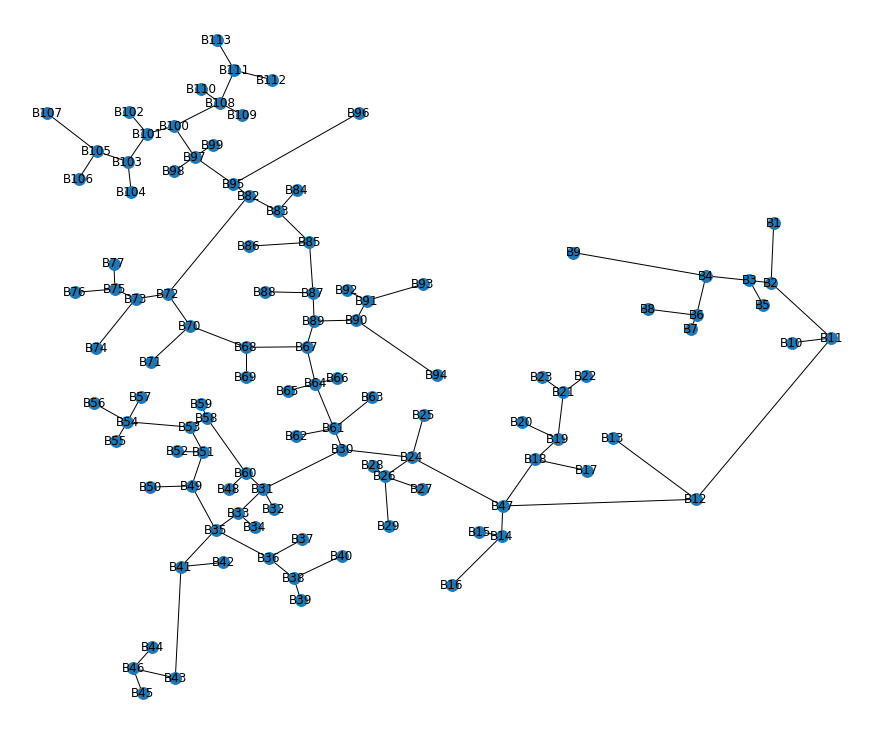

In [3]:
plt.figure(figsize=(12,10))
#nx.draw(N2, pos=nx.get_node_attributes(B, 'position'), node_size=140, with_labels = True)
nx.draw(B, pos=nx.get_node_attributes(B, 'position'), node_size=140, with_labels = True)

# This is the implimentation of TRZ 5 - Wednesday. 

In [112]:
#trz5_mon
W=nx.Graph()
trz5_mon_vertices=['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10','S11','S12','S13','S14','S15','S16','S17','S18','S19','S20','S21','S22','S23','S24','S25','S26','S27','S28','S29','S30','S31','S32','S33','S34','S35','S36','S37','S38','S39','S40','S41','S42','S43','S44','S45','S46','S47','S48','S49','S50','S51','S52','S53','S54','S55','S56','S57','S58','S59','S60','S61','S62','S63','S64','S65','S66','S67','S68','S69','S70','S71','S72','S73','S74','S75','S76','S77','S78','S79','S80','S81','S82','S83','S84','S85','S86','S87','S88','S89','S90','S95','S96','S97','S98','S99','S101','S102','S103','S104','S105','S106','S107','S108','S109','S110','S111','S112','S113','S114','S115','S116','S117','S198','S199']

trz5_mon_edges=[('S1','S2' ) ,('S2','S3' ) ,('S3','S35' ) ,('S3','S4' ) ,('S4','S36' ) ,('S4','S5' ) ,('S5','S6' ) ,('S5','S7' ) ,('S7','S8' ) ,('S8','S9' ) ,('S9','S10' ) ,('S9','S11' ) ,('S5','S11' ) ,('S11','S12' ) ,('S12','S13' ) ,('S12','S14' ) ,('S14','S15' ) ,('S2','S14' ) ,('S14','S16' ) ,('S16','S17' ) ,('S16','S18' ) ,('S8','S18' ) ,('S18','S19' ) ,('S16','S20' ) ,('S20','S21' ) ,('S21','S22' ) ,('S21','S23' ) ,('S23','S24' ) ,('S23','S25' ) ,('S25','S26' ) ,('S25','S27' ) ,('S27','S28' ) ,('S27','S29' ) ,('S29','S30' ) ,('S29','S31' ) ,('S31','S32' ) ,('S31','S33' ) ,('S33','S34' ) ,('S20','S33' ) ,('S33','S2' ) ,('S1','S198' ) ,('S1','S198' ) ,('S198','S199' ) ,('S198','S199' ) ,('S199','S37' ) ,('S37','S38' ) ,('S37','S39' ) ,('S39','S40' ) ,('S40','S41' ) ,('S40','S42' ) ,('S39','S43' ) ,('S43','S44' ) ,('S43','S45' ) ,('S45','S46' ) ,('S45','S47' ) ,('S47','S48' ) ,('S48','S49' ) ,('S48','S50' ) ,('S47','S51' ) ,('S51','S52' ) ,('S51','S53' ) ,('S53','S54' ) ,('S53','S55' ) ,('S55','S56' ) ,('S55','S57' ) ,('S57','S58' ) ,('S57','S59' ) ,('S59','S60' ) ,('S59','S61' ) ,('S61','S62' ) ,('S61','S63' ) ,('S63','S64' ) ,('S63','S65' ) ,('S65','S66' ) ,('S65','S88' ) ,('S88','S67' ) ,('S88','S68' ) ,('S68','S69' ) ,('S68','S70' ) ,('S70','S71' ) ,('S199','S72' ) ,('S199','S72' ) ,('S72','S73' ) ,('S72','S74' ) ,('S72','S74' ) ,('S74','S77' ) ,('S74','S75' ) ,('S74','S75' ) ,('S75','S76' ) ,('S75','S89' ) ,('S75','S89' ) ,('S89','S90' ) ,('S89','S90' ) ,('S90','S78' ) ,('S90','S78' ) ,('S78','S77' ) ,('S78','S77' ) ,('S78','S79' ) ,('S79','S80' ) ,('S79','S80' ) ,('S80','S81' ) ,('S81','S82' ) ,('S81','S83' ) ,('S198','S84' ) ,('S84','S85' ) ,('S85','S86' ) ,('S85','S87' ) ,('S70','S95' ) ,('S95','S96' ) ,('S95','S97' ) ,('S97','S98' ) ,('S96','S97' ) ,('S96','S99' ) ,('S99','S71' ) ,('S71','S101' ) ,('S101','S102' ) ,('S101','S103' ) ,('S103','S104' ) ,('S104','S105' ) ,('S105','S107' ) ,('S105','S106' ) ,('S104','S108' ) ,('S108','S109' ) ,('S108','S110' ) ,('S110','S111' ) ,('S110','S103' ) ,('S99','S112' ) ,('S112','S113' ) ,('S113','S114' ) ,('S114','S115' ) ,('S113','S115' ) ,('S115','S116' ) ,('S116','S117' ) ]


# Nodes and edges are added to the graph. 

W.add_nodes_from(trz5_mon_vertices)
W.add_edges_from(trz5_mon_edges)


# Dictionaries providing length of each edge and number of pickups along each edge are given as lists K, T.
# The library U is needed for technical reasons in the algorithm.  It assigns to each edge the label 'Existing'.

K = {('S1','S2' ) : 614,('S2','S3' ) : 597,('S3','S35' ) : 295,('S3','S4' ) : 450,('S4','S36' ) : 351,('S4','S5' ) : 1312,('S5','S6' ) : 460,('S5','S7' ) : 1740,('S7','S8' ) : 771,('S8','S9' ) : 1220,('S9','S10' ) : 174,('S9','S11' ) : 308,('S5','S11' ) : 410,('S11','S12' ) : 627,('S12','S13' ) : 180,('S12','S14' ) : 892,('S14','S15' ) : 440,('S2','S14' ) : 502,('S14','S16' ) : 614,('S16','S17' ) : 135,('S16','S18' ) : 673,('S8','S18' ) : 646,('S18','S19' ) : 335,('S16','S20' ) : 732,('S20','S21' ) : 230,('S21','S22' ) : 460,('S21','S23' ) : 676,('S23','S24' ) : 360,('S23','S25' ) : 312,('S25','S26' ) : 167,('S25','S27' ) : 312,('S27','S28' ) : 335,('S27','S29' ) : 394,('S29','S30' ) : 407,('S29','S31' ) : 272,('S31','S32' ) : 440,('S31','S33' ) : 1120,('S33','S34' ) : 145,('S20','S33' ) : 846,('S33','S2' ) : 1750,('S1','S198' ) : 2619,('S1','S198' ) : 2619,('S198','S199' ) : 443,('S198','S199' ) : 443,('S199','S37' ) : 364,('S37','S38' ) : 151,('S37','S39' ) : 98,('S39','S40' ) : 591,('S40','S41' ) : 144,('S40','S42' ) : 85,('S39','S43' ) : 200,('S43','S44' ) : 243,('S43','S45' ) : 289,('S45','S46' ) : 305,('S45','S47' ) : 259,('S47','S48' ) : 312,('S48','S49' ) : 262,('S48','S50' ) : 262,('S47','S51' ) : 174,('S51','S52' ) : 554,('S51','S53' ) : 971,('S53','S54' ) : 269,('S53','S55' ) : 190,('S55','S56' ) : 325,('S55','S57' ) : 184,('S57','S58' ) : 348,('S57','S59' ) : 505,('S59','S60' ) : 892,('S59','S61' ) : 374,('S61','S62' ) : 240,('S61','S63' ) : 190,('S63','S64' ) : 125,('S63','S65' ) : 121,('S65','S66' ) : 860,('S65','S88' ) : 236,('S88','S67' ) : 236,('S88','S68' ) : 522,('S68','S69' ) : 489,('S68','S70' ) : 157,('S70','S71' ) : 830,('S199','S72' ) : 501,('S199','S72' ) : 501,('S72','S73' ) : 699,('S72','S74' ) : 289,('S72','S74' ) : 289,('S74','S77' ) : 2249,('S74','S75' ) : 203,('S74','S75' ) : 203,('S75','S76' ) : 210,('S75','S89' ) : 299,('S75','S89' ) : 299,('S89','S90' ) : 85,('S89','S90' ) : 280,('S90','S78' ) : 525,('S90','S78' ) : 525,('S78','S77' ) : 876,('S78','S77' ) : 876,('S78','S79' ) : 223,('S79','S80' ) : 92,('S79','S80' ) : 235,('S80','S81' ) : 243,('S81','S82' ) : 136,('S81','S83' ) : 518,('S198','S84' ) : 2070,('S84','S85' ) : 354,('S85','S86' ) : 243,('S85','S87' ) : 794,('S70','S95' ) : 148,('S95','S96' ) : 387,('S95','S97' ) : 755,('S97','S98' ) : 187,('S96','S97' ) : 233,('S96','S99' ) : 235,('S99','S71' ) : 62,('S71','S101' ) : 492,('S101','S102' ) : 627,('S101','S103' ) : 581,('S103','S104' ) : 433,('S104','S105' ) : 207,('S105','S107' ) : 308,('S105','S106' ) : 154,('S104','S108' ) : 315,('S108','S109' ) : 105,('S108','S110' ) : 486,('S110','S111' ) : 295,('S110','S103' ) : 1034,('S99','S112' ) : 325,('S112','S113' ) : 554,('S113','S114' ) : 272,('S114','S115' ) : 112,('S113','S115' ) : 971,('S115','S116' ) : 269,('S116','S117' ) : 646}
    
    
T = {('S1','S2' ) : 4,('S2','S3' ) : 5,('S3','S35' ) : 6,('S3','S4' ) : 5,('S4','S36' ) : 4,('S4','S5' ) : 18,('S5','S6' ) : 2,('S5','S7' ) : 26,('S7','S8' ) : 11,('S8','S9' ) : 18,('S9','S10' ) : 4,('S9','S11' ) : 3,('S5','S11' ) : 3,('S11','S12' ) : 6,('S12','S13' ) : 5,('S12','S14' ) : 5,('S14','S15' ) : 7,('S2','S14' ) : 1,('S14','S16' ) : 4,('S16','S17' ) : 4,('S16','S18' ) : 6,('S8','S18' ) : 3,('S18','S19' ) : 9,('S16','S20' ) : 5,('S20','S21' ) : 2,('S21','S22' ) : 6,('S21','S23' ) : 6,('S23','S24' ) : 2,('S23','S25' ) : 2,('S25','S26' ) : 7,('S25','S27' ) : 2,('S27','S28' ) : 6,('S27','S29' ) : 2,('S29','S30' ) : 9,('S29','S31' ) : 2,('S31','S32' ) : 6,('S31','S33' ) : 17,('S33','S34' ) : 0,('S20','S33' ) : 8,('S33','S2' ) : 17,('S1','S198' ) : 0,('S1','S198' ) : 0,('S198','S199' ) : 3,('S198','S199' ) : 3,('S199','S37' ) : 2,('S37','S38' ) : 6,('S37','S39' ) : 0,('S39','S40' ) : 11,('S40','S41' ) : 2,('S40','S42' ) : 2,('S39','S43' ) : 1,('S43','S44' ) : 8,('S43','S45' ) : 3,('S45','S46' ) : 11,('S45','S47' ) : 2,('S47','S48' ) : 4,('S48','S49' ) : 6,('S48','S50' ) : 8,('S47','S51' ) : 1,('S51','S52' ) : 11,('S51','S53' ) : 17,('S53','S54' ) : 6,('S53','S55' ) : 1,('S55','S56' ) : 3,('S55','S57' ) : 2,('S57','S58' ) : 7,('S57','S59' ) : 7,('S59','S60' ) : 19,('S59','S61' ) : 5,('S61','S62' ) : 8,('S61','S63' ) : 0,('S63','S64' ) : 5,('S63','S65' ) : 0,('S65','S66' ) : 20,('S65','S88' ) : 0,('S88','S67' ) : 6,('S88','S68' ) : 1,('S68','S69' ) : 14,('S68','S70' ) : 0,('S70','S71' ) : 6,('S199','S72' ) : 5,('S199','S72' ) : 3,('S72','S73' ) : 17,('S72','S74' ) : 2,('S72','S74' ) : 1,('S74','S77' ) : 39,('S74','S75' ) : 2,('S74','S75' ) : 0,('S75','S76' ) : 5,('S75','S89' ) : 3,('S75','S89' ) : 1,('S89','S90' ) : 1,('S89','S90' ) : 4,('S90','S78' ) : 3,('S90','S78' ) : 4,('S78','S77' ) : 5,('S78','S77' ) : 4,('S78','S79' ) : 1,('S79','S80' ) : 0,('S79','S80' ) : 1,('S80','S81' ) : 1,('S81','S82' ) : 1,('S81','S83' ) : 3,('S198','S84' ) : 0,('S84','S85' ) : 2,('S85','S86' ) : 5,('S85','S87' ) : 22,('S70','S95' ) : 0,('S95','S96' ) : 0,('S95','S97' ) : 37,('S97','S98' ) : 37,('S96','S97' ) : 37,('S96','S99' ) : 0,('S99','S71' ) : 0,('S71','S101' ) : 4,('S101','S102' ) : 11,('S101','S103' ) : 3,('S103','S104' ) : 3,('S104','S105' ) : 2,('S105','S107' ) : 2,('S105','S106' ) : 9,('S104','S108' ) : 6,('S108','S109' ) : 4,('S108','S110' ) : 9,('S110','S111' ) : 8,('S110','S103' ) : 11,('S99','S112' ) : 0,('S112','S113' ) : 0,('S113','S114' ) : 0,('S114','S115' ) : 0,('S113','S115' ) : 26,('S115','S116' ) : 0,('S116','S117' ) : 24}
    
U = {x: 'Existing' for x in trz5_mon_edges}

#D = {x: True for x in trz5_mon_edges }


# Attributes provided above are assigned to the graph.


nx.set_edge_attributes(W, K, name='distance')
nx.set_edge_attributes(W, T, name='pickups')
nx.set_edge_attributes(W, U, name='edgestatus')
#nx.set_edge_attributes(W, D, name='divided')

#W['S198']['S84']['divided']=False

#divided_roads=[W[u][v]['divided'] for u,v in trz5_mon_edges]

#coloring=['red' if i==True else 'green' for i in divided_roads]



# Cartesian coordinates are provided for each node. 
node_positions_W = { 'S1':(14.6990152147928, 32.8598518346260), 'S2':(14.7403688235695, 29.1380270447251), 'S3':(11.4111818245030, 30.3317263041812), 'S4':(8.69323703581982, 30.5492823060522), 'S5':(6.08997225519739, 23.5460900686061), 'S6':(3.31496179414274, 23.3432502817977), 'S7':(8.71959079200738, 15.9016488229517), 'S8':(12.2851662202634, 15.9178103639509), 'S9':(10.5258677264366, 23.0523062216281), 'S10':(11.3980859452963, 23.7882403437909), 'S11':(8.82137421298283, 23.5174463635394), 'S12':(10.1976251880937, 26.9071473236529), 'S13':(9.67337982194330, 27.9556380559538), 'S14':(15.2070809090868, 26.1499040169912), 'S15':(17.7991829972751, 25.1887875123820), 'S16':(14.9449582260116, 22.3928122262463), 'S17':(14.0129664639664, 22.7131843944494), 'S18':(14.3915881172972, 18.4027224949901), 'S19':(16.6050685521547, 17.7911029011479), 'S20':(18.7602995018842, 20.6162029298476), 'S21':(18.8767984721399, 18.8687183760127), 'S22':(21.4689005603282, 18.8104688908849), 'S23':(18.1602876267727, 14.8940161227320), 'S24':(16.3138211265155, 15.5193729811627), 'S25':(20.0897203541499, 14.6935555796279), 'S26':(19.9268461628778, 13.5534362407231), 'S27':(22.0000000000000, 15.0000000000000), 'S28':(22.6921397480125, 16.8591111391027), 'S29':(24.2838131819779, 16.1429445029618), 'S30':(23.4922605841380, 14.7483042115296), 'S31':(25.1232326873917, 17.4472578181703), 'S32':(27.3907391826274, 15.9547218972557), 'S33':(22.3677817564725, 23.2738884325102), 'S34':(23.0853471030661, 24.0775616206950), 'S35':(12.0000000000000, 32.0000000000000), 'S36':(8.91008209485660, 32.7177328964205), 'S37':(28.4503716754069, 34.9333789306196), 'S38':(28.3743560391468, 36.0432072200170), 'S39':(27.7814340763180, 34.8421601671075), 'S40':(26.8236370594408, 31.9839722437279), 'S41':(26.4131526236363, 31.0565814813547), 'S42':(26.3371369873762, 31.8623472257117), 'S43':(26.5955901506605, 34.2644413315308), 'S44':(25.8658400425636, 35.6935352932206), 'S45':(25.1657220868634, 33.6107068596939), 'S46':(23.9374442389382, 35.1460541696005), 'S47':(24.1607674840155, 32.3265982004993), 'S48':(22.6533355797436, 33.3315528033473), 'S49':(21.5632756956733, 32.1511159677619), 'S50':(21.4112589588457, 33.9318834563134), 'S51':(23.7141209938608, 31.4891360314594), 'S52':(25.8356918220954, 29.2000727694168), 'S53':(25.6972849646666, 26.3737707297944), 'S54':(27.2185234994449, 27.0339308486605), 'S55':(26.1852294003502, 25.3404766306996), 'S56':(24.2334516576157, 24.4793982147874), 'S57':(26.4722555389876, 23.9340485513762), 'S58':(28.0000000000000, 24.0000000000000), 'S59':(27.5749917462849, 21.2524174853711), 'S60':(31.5251229790136, 22.9226072012229), 'S61':(29.3777362014900, 20.1389576748033), 'S62':(30.4646850641871, 21.1728846417591), 'S63':(29.9874880025152, 19.2110744993301), 'S64':(29.1391376706540, 18.8929431248821), 'S65':(30.2791084290925, 18.6013226983048), 'S66':(33.6725097565373, 22.1272787651030), 'S67':(29.9874880025152, 16.5069578165225), 'S68':(32.8319336964433, 14.5270853736715), 'S69':(29.6985346829954, 14.0257346833822), 'S70':(32.6498491629705, 13.9051899881962), 'S71':(32.1945669674566, 8.79163162561565), 'S72':(30.7207179688916, 32.2412106296698), 'S73':(28.1338621938618, 29.0507551737997), 'S74':(31.5255175433453, 30.6603543227071), 'S75':(32.6177455372468, 30.3729259032593), 'S76':(33.2863820246483, 31.7644870477030), 'S77':(41.0679979023383, 24.8951961838761), 'S78':(38.0099789828867, 28.6613637850218), 'S79':(38.4571092268180, 29.9591320539932), 'S80':(38.4462036111123, 30.3844510665133), 'S81':(37.5192262761328, 31.6822193354847), 'S82':(37.8489016402862, 32.9523245041099), 'S83':(34.7570275236665, 32.6310936636490), 'S84':(42.8590589103073, 39.6851423288372), 'S85':(43.0892213030188, 37.4366328000401), 'S86':(44.2931476648943, 37.5959759949942), 'S87':(39.1343167343804, 35.8334359776312), 'S88':(31.4190791875310, 17.5408847834783), 'S89':(34.4397761337329, 29.9295418741593), 'S90':(35.0689001932336, 29.7547851909646), 'S95':(32.7164965552407, 12.5055947505207), 'S96':(32.3388279990426, 10.1062886287912), 'S97':(34.0000000000000, 10.0000000000000), 'S98':(34.7087652475139, 9.04298008335270), 'S99':(32.5263874121452, 8.77504060338122), 'S101':(29.3409111431348, 8.26071891411389), 'S102':(30.3861455439038, 11.5291502942965), 'S103':(25.8648989491859, 8.18975515171958), 'S104':(26.4706642965785, 10.6498261158718), 'S105':(27.6154448307542, 11.1973298496080), 'S106':(27.2836243860656, 13.1384794510362), 'S107':(28.2956767423657, 10.4507338490586), 'S108':(24.9362212893683, 11.7225454172364), 'S109':(25.0000000000000, 12.5000000000000), 'S110':(21.8263521726702, 11.3799666320213), 'S111':(19.9833407768309, 11.3198684343308), 'S112':(34.1040578319433, 7.60384260745473), 'S113':(37.4211074355128, 7.07715409388556), 'S114':(39.0552039413748, 6.71571744282267), 'S115':(39.6656471228865, 7.08198335172970), 'S116':(41.3416121557298, 7.22382584217827), 'S117':(42.3767264573611, 3.79998622909026), 'S198':(30.3507625819092, 37.6652615643389), 'S199':(30.4875907271774, 35.1006133303918)}
nx.set_node_attributes(W, node_positions_W, 'position')



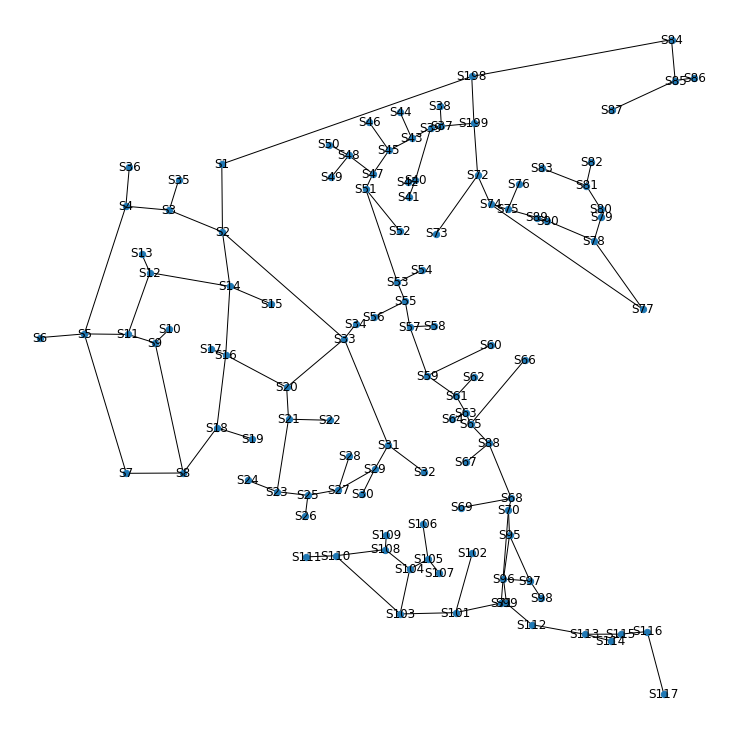

In [5]:
plt.figure(figsize=(10,10))
nx.draw(W, pos=nx.get_node_attributes(W, 'position'),  node_size=40, with_labels = True)

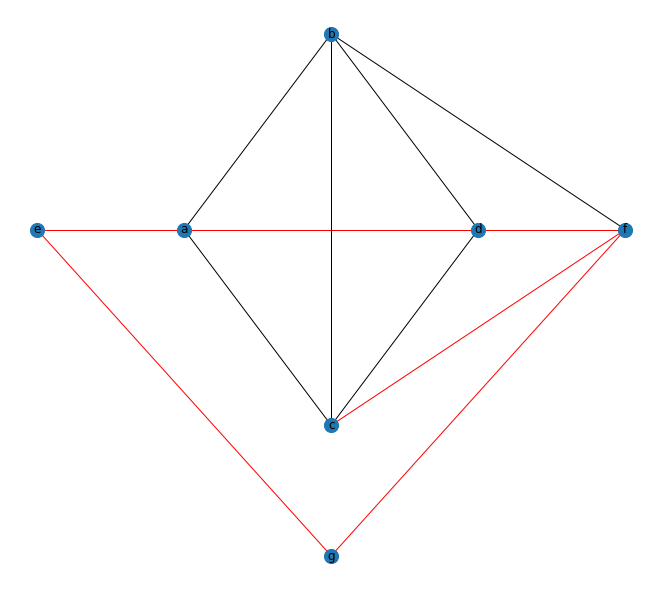

In [27]:
# This is a practice graph for debugging.

Z=nx.Graph()
vertices=['a','b','c','d','e','f','g']

edges=[('a', 'd'), ('c', 'f'),('b', 'f'),('e', 'a'), ('a', 'b'), ('b','c'), ('b','d'), ('a', 'c'), ('c', 'd'), ('d', 'f'), ('e', 'g'), ('f', 'g')]

colors=np.array([x,(0.2, 0.4, 0.4)] for x in edges)
# Nodes and edges are added to the graph. 

Z.add_nodes_from(vertices)
Z.add_edges_from(edges)

# Dictionaries providing length of each edge and number of pickups along each edge are given as lists K, T.
# The library U is needed for technical reasons in the algorithm.  It assigns to each edge the label 'Existing'.

KZ = {('l', 'k'): 100, ('c', 'f'):120, ('a', 'd'): 110, ('b', 'f'): 75, ('h', 'k'): 100, ('h', 'l'): 100,('f', 'h'): 100, ('f', 'j'): 100, ('e', 'a'): 123, ('a', 'b'): 200,('b', 'c'): 200, ('b','d'):196, ('a', 'c'):215, ('c', 'd'):160, ('d', 'f'):224, ('e', 'g'):209, ('f', 'g'):229}    
TZ = {('l', 'k'): 7, ('c', 'f'): 2, ('b', 'f'): 9,('a', 'd'): 11, ('h', 'k'): 7, ('h', 'l'): 8,('f', 'h'): 10, ('f', 'j'): 10,('e', 'a'):4, ('a', 'b'):6, ('b','d'):5, ('a', 'c'):12,('b', 'c'): 12, ('c', 'd'):11, ('d', 'f'):10, ('e', 'g'):0, ('f', 'g'):0}
TZ2 = {list(TZ.keys())[i]: (TZ[list(TZ.keys())[i]], [ (list(TZ.keys())[i][0], list(TZ.keys())[i][1]), 2] , \
                            [ (list(TZ.keys())[i][1], list(TZ.keys())[i][0]),  TZ[list(TZ.keys())[i]] - 2])  \
                            for i in range(len(list(TZ.keys())))}

UZ = {x: 'Existing' for x in edges}
UD = {edges[i]: False for i in range(len(edges))}
UD = TZ = {('l', 'k'): True,('h', 'k'): True, ('h', 'l'): False,('f', 'h'): False, ('f', 'j'): True, \
           ('e', 'a'): False, ('a', 'b'):False, ('b','d'):True, ('a', 'c'):False,  \
           ('b', 'c'): False, ('c', 'd'):True, ('d', 'f'):True, ('e', 'g'):True, ('f', 'g'):True}


UC = {edges[i]: 'b' for i in range(len(edges))}
# Attributes provided above are assigned to the graph.



nx.set_edge_attributes(Z, KZ, name='distance')
nx.set_edge_attributes(Z, TZ2, name='pickups')
nx.set_edge_attributes(Z, UZ, name='edgestatus')
nx.set_edge_attributes(Z, UD, name='divided')
nx.set_edge_attributes(Z, UC, name='colors')
#divided_roads=[Z[u][v]['divided'] for u,v in edges]
coloring=['red' if i==True else 'black' for i in divided_roads]

# Cartesian coordinates are provided for each node. 
node_positions_Z = {'k': (16, 12), 'l': (20,12), 'a': (6,6), 'b':(10,9), 'c':(10,3), 'd':(14,6), 'e':(2,6), 'f':(18,6), 'g':(10,1), 'h':(18, 9), 'j': (18,3)}
nx.set_node_attributes(Z, node_positions_Z, 'position')

plt.figure(figsize=(9,8))
nx.draw(Z, pos=nx.get_node_attributes(Z, 'position'), node_size=200,edge_color=coloring, with_labels = True)

In [37]:
L=fleury2(Z, 'e')

In [39]:
L[1]

['e', 'a', 'd', 'b', 'a', 'c', 'b', 'f', 'd', 'c', 'f', 'g', 'e']

In [55]:
(L[0],L[1])

(['e', 'a', 'd', 'b', 'a', 'c', 'b', 'f', 'c', 'd', 'f', 'g', 'e'],
 ['e', 'a', 'd', 'b', 'a', 'c', 'b', 'f', 'd', 'c', 'f', 'g', 'e'])

In [58]:
path0=L[1]
path=[(path0[i], path0[i+1]) for i in range(len(path0)-1)]
path

[('e', 'a'),
 ('a', 'd'),
 ('d', 'b'),
 ('b', 'a'),
 ('a', 'c'),
 ('c', 'b'),
 ('b', 'f'),
 ('f', 'd'),
 ('d', 'c'),
 ('c', 'f'),
 ('f', 'g'),
 ('g', 'e')]

In [152]:
len(A)

264

In [151]:
min(A)

56987.5

In [72]:
A=[cost_path2(Z,x) for x in L]

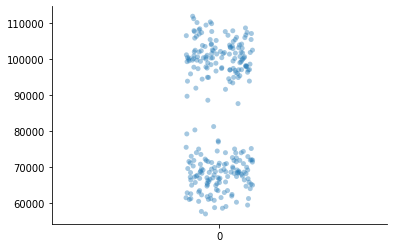

In [83]:

sns.stripplot(data=A, jitter=True, edgecolor='none', alpha=.40)
sns.despine()


In [63]:
L[1]

['e', 'a', 'd', 'b', 'a', 'c', 'b', 'f', 'd', 'c', 'f', 'g', 'e']

In [69]:
cost_path2(Z, L[2])

99022.5

# The work function

The function cost_path2 below finds the cost of work for a given path.

In [66]:
def cost_path2(G, path0):
    if type(path0[0])==tuple:
        path = path0
    else:
        path=[(path0[i], path0[i+1]) for i in range(len(path0)-1)]
    work=0
    accum_pickups=0
    edges_traveled=[]
    incremental_work=0
    for x in path:
        if [set(y) for y in path].count(set(x))>1:  # if x is crossed more than once
            if G[x[0]][x[1]]['divided']==True:            #If x is a divided road
                if set(x) not in edges_traveled:
                    R = G[x[0]][x[1]]['pickups']
                    work = work + G[x[0]][x[1]]['distance']*(accum_pickups + 0.5*[y[1] for y in R[1:] if y[0][0]==x[0]][0])
                    edges_traveled=edges_traveled+[set(x)]
                    accum_pickups=accum_pickups+ [y[1] for y in R[1:] if y[0][0]==x[0]][0]
                else: 
                    work = work + G[x[0]][x[1]]['distance']*(accum_pickups + 0.5*[y[1] for y in R[1:] if y[0][0]==x[0]][0])
                    edges_traveled=edges_traveled+[set(x)]
                    accum_pickups=accum_pickups+ [y[1] for y in R[1:] if y[0][0]==x[0]][0]
            else:                                      #if x is not a divided road
                if set(x) not in edges_traveled:
                    R = G[x[0]][x[1]]['pickups']
                    work = work + G[x[0]][x[1]]['distance']*accum_pickups
                    edges_traveled=edges_traveled+[set(x)]
                else: 
                    work = work + G[x[0]][x[1]]['distance']*(accum_pickups + 0.5*G[x[0]][x[1]]['pickups'][0])
                    edges_traveled=edges_traveled+[set(x)]
                    accum_pickups=accum_pickups+ G[x[0]][x[1]]['pickups'][0]
        else:                                     # If x is crossed only once 
            work = work + G[x[0]][x[1]]['distance']*(accum_pickups + 0.5*G[x[0]][x[1]]['pickups'][0])
            edges_traveled=edges_traveled+[set(x)]
            accum_pickups=accum_pickups+ G[x[0]][x[1]]['pickups'][0]
    return (work)

# Optimal route through a tree

This code generates the optimal route through a tree, using the weight-to-distance ratio criterion.  There are many functions contained herein; the one that does the final stroke of work is omega (at the bottom).

In [114]:
# If G is a tree and we specify a root vertex x and one of its descendants y, the branchthrough
# function gives the...
def branchthrough(G,root,branch):
    list2=[]
    for x in G.nodes():
        if branch in djk_path(G, root, x):
            list2.append(x)
    list2.append(root)
    R=G.subgraph(list2)
    return R

def children(G,root, vertex):
    list4=[]
    for x in G.nodes():
        if depth(G, root, x) == depth(G, root, vertex)+1 and len(djk_path(G, x,vertex))==2:
            list4.append(x)
    return list4

def subgraph_at(G, root, vertex):
    list2=[]
    for x in G.nodes():
            if all(depth(G, root, djk_path(G, vertex, x)[i+1]) - depth(G, root, djk_path(G, vertex, x)[i])==1 \
                   for i in list(range(0,len( djk_path(G, vertex, x))-1))): 
                list2.append(x)
    R=G.subgraph(list2)
    return R

def branchratio(G,r,s):
    total1=0
    total2=0

    for x in branchthrough(G,r, s).edges():
        total1 = total1+G.edges[x]['distance']

    for x in branchthrough(G,r, s).edges():
        total2 = total2+G.edges[x]['pickups'][0]
    
    return(total2/total1)

def vertex_ordered_children(G, root, v):
    W=[]
    for x in children(G, root, v):
        W.append(x)
    return sorted(W, key=lambda R: branchratio(G,v,R), reverse = False)

def reemovNestings(l):
    for i in l: 
        if type(i) == list: 
            reemovNestings(i) 
        else: 
            output.append(i) 
    return output

def gamma(G, root, v): 
    path=[]
    # if there is a loop from v to itself, return [v,v]
    if (v,v) in G.edges(v):
        return v
    else:
    #else, do this...
        if G.degree(v) == 1:
            return []
        else: 
            for x in vertex_ordered_children(G,root,v):
                path.append(x)
                path.append(gamma(G, root, x))
                path.append(v)
            return list(path)

def delta(G, root, v):
    return list([v, gamma(G, root,v)])

def omega(G, root, v):
    global output
    output=[]
    edgelist=[]
    reemovNestings(delta(G,root,v))
    edgelist=[(output[i], output[i+1]) for i in range(len(output)-1)]
    return edgelist




# Optimal route around a loop

This code finds the optimal route around a loop, using the R1-R2 criterion.

In [115]:
# If G is a loop and S is a continuous ordered set of vertices, nextnode(G,S) provides the next vertex in G.
def nextnode(G, S):
    for x in list(G.neighbors(S[len(S)-1])):
        if x not in S:
            S.append(x)
    return S

# If G is a loop, root is an arbitrary vertex, and x is adjacent to root, loopthru gives the loop starting at \
# root in the direction of x, stopping just short of returning to the root.
def loopthru(G, root, x):
    S = [root, x]
    while len(S)<len(list(G.edges)):
        S=nextnode(G,S)
    return S

# Inputs to net_product are: a cycle G, an arbirary root vertex 'root', and two adjacent vertices x,y. \
#.  The output is the 'net product' of distances and weights corresponding to the edge ('x','y'), defined elsewhere.
def net_product(G, root,a,b):
    #First we collect all edges that occur between 'root' and the edge (a, b). 
    T = list(nx.all_simple_paths(G, root, a))
    if b==root:
        W = T[sorted([(i,len(l)) for i,l in enumerate(T)], key=lambda t: t[1])[-1][0]]
        V = [(W[i], W[i+1]) for i in range(len(W)-1)] 
    else:
        U = [x for x in T if b not in x]
        V=[]
        if len(U)> 0:
            V = [(U[0][i], U[0][i+1]) for i in range(len(U[0])-1)] 
    #Now we collect all edges that occur after the edge (a, b).
    TT = list(nx.all_simple_paths(G, root, b))
    if a==root:
        WW = TT[sorted([(i,len(l)) for i,l in enumerate(TT)], key=lambda t: t[1])[-1][0]]
        VV = [(WW[i], WW[i+1]) for i in range(len(WW)-1)] 
    else:
        UU = [x for x in TT if a not in x]
        VV=[]
        if len(UU)> 0:
            VV = [(UU[0][i], UU[0][i+1]) for i in range(len(UU[0])-1)] 
    S=G[a][b]['pickups'][0]*(-sum(G[V[i][0]][V[i][1]]['distances'] for i in range(len(V))) \
                        + sum(G[VV[i][0]][VV[i][1]]['distances'] for i in range(len(VV))))       
    return S

#Inputs to cycle_difference are: a cycle G, an arbitrary root vertex 'root', and a neighbor 'a' of root, \
#which providesa  direction/orientation.  Let us call the orientation that starts at 'root' and travels next\
#through 'a' the positive orientation, and the opposite orientation the negative orientation.  Let R1 be the\
# work cost for a trip with positive orientation, and R2 the work cost for a trip with negative orientation.\
# Then R1-R2 is given by the cycle_difference function:
def cycle_difference(G, root, a):
    S=loopthru(G, root, a)
    T = [(S[i], S[i+1]) for i in range(len(S)-1)]
    T = T+ [(S[len(S)-1], S[0])]
    R=sum(net_product(G,root,T[i][0],T[i][1]) for i in range(len(T)))
    return R

# Identification of neighborhoods

## The code below identifies neighborhoods (those subgraphs that we collapse later to simplify the graph).

Suppose $G$ is a connected graph.  Henceforth we identify a particular vertex $V$ as the root of $G$.  We adopt the following definitions: 

We define the *depth* of a vertex $W$ to be the length (number of edges) of the minimal path from the root $V$ to $W$.


If $U$ and $W$ are vertices, we will say that $W$ is a *descendant* of $U$ if the depth of $W$ is greater than the depth of $U$, and if the path from $U$ to $W$ is strictly increasing in depth.  Note that this is a transitive property. 

We will call an edge in a graph $G$ a *bridge* if its removal results in a disconnection of $G$.

Given a bridge $(A, B)$, with depth($B$) > depth($A$), we define the subgraph *generated by* $(A, B)$ to be the full subgraph generated by all vertices $W$ such that 
1. $W$ is a descendant of $A$
2. Any path from $A$ to $W$ contains $B$ 

A connected subgraph $H$ of $G$ is a *branch* if it is generated by a bridge. 

A connected subgraph $H$ of $G$ is a *neighborhood* if it is a *maximal branch*; i.e., if $H$ is not a subgraph of any other branch.


## Algorithms needed:

1. Construct the subrgraph of $G$ generated by a set of vertices.
2. Generate a list of all bridges in $G$.
2. Define the depth of a node.
2. Given two graphs $H$ and $K$, determine if $H$ is a subgraph of $K$ (Boolean).
2. Given two vertices $U$ and $W$, generate a list of all paths from $U$ to $W$ (list)
2. Given a root, determine if one node is a descendant of another
3. Determine if a path lies in a particular subgraph (Boolean)
4. Determine if an edge is a bridge (Boolean)
5. Construct the subgraph generated by a bridge (Graph)
1. Determine if a subgraph generated by a bridge is maximal. 


In [116]:
#The djk_path function on two vertices x, y returns the shortest path from x to y.  
def djk_path(G,x,y):
    return nx.dijkstra_path(G, source=x, target=y) 

# Subgraph of $G$ generated by a set of vertices is provided by G.subgraph([nodes]).  Input is a list of nodes.  

#provides the depth of a vertex, starting with root at depth = 0.
def depth(G, root, vertex):
    x=len(djk_path(G, root,vertex))-1
    return x

#  Given two graphs $H$ and $K$, determine if $H$ is a subgraph of $K$ (Boolean)
def is_subgraph(H, G):
    B=set(H.nodes).issubset(set(G.nodes))
    return B

#Given two vertices $U$ and $W$, generate a list of all paths from $U$ to $W$ (list)
def all_paths(G, source, target):
    return list(nx.all_simple_paths(G, source, target))

# Given a root, determine if one node is a descendant of another
def is_descendant(G, root, source, target):
    A=djk_path(G, source,target)
    if depth(G, root,source)<depth(G, root,target):
        if all(depth(G, root, A[i]) <depth(G, root, A[i+1]) for i in range(len(A)-1)):
            return True
        else: 
            return False
    else:
        return False
        

#Determine if a path lies in a particular subgraph (Boolean).  The variable path is a list.
def path_containment(path, G):
    B = set(path).issubset(set(G.nodes))
    return B

# Determine if an edge is a bridge (Boolean).
def is_bridge(edge, G):
    if (edge[1], edge[0]) in list(nx.bridges(G)):
        return True
    elif (edge[0], edge[1]) in list(nx.bridges(G)):
        return True
    else: 
        return False
    
# Generate list of all bridges in G.
def bridges(G):
    L = [x for x in G.edges if is_bridge(x, G)]
    return L

#  Construct the subgraph generated by a bridge (Graph)
def bridge_subgraph(G, root, edge):
    if is_bridge(edge, G):
        S = {edge[i]: depth(G, root, edge[i]) for i in range(2)}
        x0=min(S, key=S.get)
        x1=max(S, key=S.get)
        L = G.subgraph([x0]+[x for x in G.nodes if is_descendant(G, root, x0, x) and x1 in djk_path(G, x0, x)])
        return L
    else :
        return False
    
# Generate collection of subgraphs generated by bridges.
def bridge_subgraphs(G, root):
    L = bridges(G)
    L1 = [(x[1], x[0]) for x in L]
    M = [bridge_subgraph(G, root, x) for x in L]
    #+[bridge_subgraph(G, root, x) for x in L1]
    N = [(x, len(x.nodes)) for x in M]
    return M

# Determine if a bridge subgraph is maximal.
def maximal_bridge_subgraph(G, H, root):
    L = bridge_subgraphs(G, root)
    N = [x for x in L if is_subgraph(H, x)]
    if len(N)>1:
        return False
    else: 
        return True


# This is the most important function here: it produces a list of all neighborhoods.


def all_neighborhoods(G, root):
    L = bridges(G)
    #L1 = [(x[1], x[0]) for x in L]
    bridge_subgraphs2=bridge_subgraphs(G, root)
    bridge_subgraphs3 = [bridge_subgraph(G, root, x) for x in L]
    S=[x for x in bridge_subgraphs3 if not  \
        len([y for y in bridge_subgraphs2 if is_subgraph(x, y)] )>1 ]
    return S
    


#Input for this function consists of the graph, and a root.  Ouput consists of a list of all of 
#the 'neighborhood roots'.  

def neighborhood_nodes(G, root):
    N=all_neighborhoods(G, root)
    T=[sorted(list(N[i].nodes), key = lambda x: depth(G, root, x), reverse=False)[0] for i in range(len(N))]
    return T

## Replacing neighborhood nodes with edges

# Finding minimal Eulerization

The code below finds a minimal Eulerization of G.

In [117]:
# Generate a list of all odd vertices in G.

def nodes_odd_degree(G):
    a=[v for v, d in G.degree() if d % 2 == 1]
    return a

# Compute all pairs of odd nodes. in a list of tuples
def odd_node_pairs(G):
    L=list(itertools.combinations(nodes_odd_degree(G), 2))
    return L

# Generate a dictionary which lists, for every pair of odd vertices, 
# the distance of the shortest path between those vertices.

def get_shortest_paths_distances(graph, pairs, edge_weight_name):
    """Compute shortest distance between each pair of nodes in a graph.\
       Return a dictionary keyed on node pairs (tuples)."""
    distances = {}
    for pair in pairs:
        distances[pair] = nx.dijkstra_path_length(graph, pair[0], pair[1], weight=edge_weight_name)
    return distances

# Compute shortest paths.  
# Return a dictionary with node pairs keys and a single value equal to shortest path distance.

def odd_node_pairs_shortest_paths(G):
    L = get_shortest_paths_distances(G, odd_node_pairs(G), 'distance')
    return L

def create_complete_graph(pair_weights, flip_weights=True):
    """
    Create a completely connected graph using a list of vertex pairs and the shortest path distances between them
    Parameters: 
        pair_weights: list[tuple] from the output of get_shortest_paths_distances
        flip_weights: Boolean. Should we negate the edge attribute in pair_weights?
    """
    g = nx.Graph()
    for k, v in pair_weights.items():
        wt_i = - v if flip_weights else v
        # g.add_edge(k[0], k[1], {'distance': v, 'weight': wt_i})  # deprecated after NX 1.11 
        g.add_edge(k[0], k[1], **{'distance': v, 'weight': wt_i})  
    return g



# g_odd_complete(G) yields the complete graph on the collection of
# all vertices of odd degree, where edges have length equal to path distances.

def odd_complete(G):
    return create_complete_graph(odd_node_pairs_shortest_paths(G), flip_weights=True)


# Compute min weight matching.
# Note: max_weight_matching uses the 'weight' attribute by default as the attribute to maximize.
def odd_matching_dupes(G):
    return nx.algorithms.max_weight_matching(odd_complete(G), True)

def odd_matching(G):
    return list(odd_matching_dupes(G))

# Augmenting the original graph: 

def add_augmenting_path_to_graph(graph, min_weight_pairs):
    """
    Add the min weight matching edges to the original graph
    Parameters:
        graph: NetworkX graph (original graph from trailmap)
        min_weight_pairs: list[tuples] of node pairs from min weight matching
    Returns:
        augmented NetworkX graph
    """
    
    # We need to make the augmented graph a MultiGraph so we can add parallel edges
    graph_aug = nx.MultiGraph(graph.copy())
    for pair in min_weight_pairs:
        graph_aug.add_edge(pair[0], 
                           pair[1], 
                           **{'distance': nx.dijkstra_path_length(graph, pair[0], pair[1]), 'edgestatus': 'augmented'}
                           # attr_dict={'distance': nx.dijkstra_path_length(graph, pair[0], pair[1]),
                           #            'trail': 'augmented'}  # deprecated after 1.11
                          )
    return graph_aug


def create_eulerian_circuit(graph_augmented, graph_original, starting_node=None):
    """Create the eulerian path using only edges from the original graph."""
    euler_circuit = []
    naive_circuit = list(nx.eulerian_circuit(graph_augmented, source=starting_node))
    
    for edge in naive_circuit:
        edge_data = graph_augmented.get_edge_data(edge[0], edge[1])    
        
        if edge_data[0]['edgestatus'] != 'augmented':
            # If `edge` exists in original graph, grab the edge attributes and add to eulerian circuit.
            edge_att = graph_original[edge[0]][edge[1]]
            euler_circuit.append((edge[0], edge[1], edge_att)) 
        else: 
            aug_path = nx.shortest_path(graph_original, edge[0], edge[1], weight='distance')
            aug_path_pairs = list(zip(aug_path[:-1], aug_path[1:]))
            
            print('Filling in edges for augmented edge: {}'.format(edge))
            print('Augmenting path: {}'.format(' => '.join(aug_path)))
            print('Augmenting path pairs: {}\n'.format(aug_path_pairs))
            
            # If `edge` does not exist in original graph, find the shortest path between its nodes and 
            #  add the edge attributes for each link in the shortest path.
            for edge_aug in aug_path_pairs:
                edge_aug_att = graph_original[edge_aug[0]][edge_aug[1]]
                euler_circuit.append((edge_aug[0], edge_aug[1], edge_aug_att))                                    
    return euler_circuit



def create_eulerian_circuit2(graph_augmented, graph_original, starting_node=None):
    """Create the eulerian path using only edges from the original graph."""
    euler_circuit = []
    naive_circuit = list(nx.eulerian_circuit(graph_augmented, source=starting_node))
    
    for edge in naive_circuit:
        edge_data = graph_augmented.get_edge_data(edge[0], edge[1])    
        
        if edge_data[0]['edgestatus'] != 'augmented':
            # If `edge` exists in original graph, grab the edge attributes and add to eulerian circuit.
            edge_att = graph_original[edge[0]][edge[1]]
            euler_circuit.append((edge[0], edge[1], edge_att)) 
        else: 
            aug_path = nx.shortest_path(graph_original, edge[0], edge[1], weight='distance')
            aug_path_pairs = list(zip(aug_path[:-1], aug_path[1:]))
            
            #print('Filling in edges for augmented edge: {}'.format(edge))
            #print('Augmenting path: {}'.format(' => '.join(aug_path)))
            #print('Augmenting path pairs: {}\n'.format(aug_path_pairs))
            
            # If `edge` does not exist in original graph, find the shortest path between its nodes and 
            #  add the edge attributes for each link in the shortest path.
            for edge_aug in aug_path_pairs:
                edge_aug_att = graph_original[edge_aug[0]][edge_aug[1]]
                euler_circuit.append((edge_aug[0], edge_aug[1], edge_aug_att))
                                      
    return euler_circuit


def create_cpp_edgelist(euler_circuit):
    """
    Create the edgelist without parallel edge for the visualization
    Combine duplicate edges and keep track of their sequence and # of walks
    Parameters:
        euler_circuit: list[tuple] from create_eulerian_circuit
    """
    cpp_edgelist = {}

    for i, e in enumerate(euler_circuit):
        edge = frozenset([e[0], e[1]])

        if edge in cpp_edgelist:
            cpp_edgelist[edge][2]['sequence'] += ', ' + str(i)
            cpp_edgelist[edge][2]['visits'] += 1

        else:
            cpp_edgelist[edge] = e
            cpp_edgelist[edge][2]['sequence'] = str(i)
            cpp_edgelist[edge][2]['visits'] = 1
        
    return list(cpp_edgelist.values())

def euler_circuit(G, root):
    g_aug=add_augmenting_path_to_graph(G, odd_matching(G))
    output = create_eulerian_circuit(g_aug, G, root)
    return output

def euler_circuit2(G, root):
    g_aug=add_augmenting_path_to_graph(G, odd_matching(G))
    output = create_eulerian_circuit2(g_aug, G, root)
    return output

# The final algorithm

The main loop is the shortest path joining the starting and endoing points of the route. 

Given a loop neighborhood N, either the loop neighborhood intersects the fundamental path or it does not. 

1. If N does intersect the fundamental path, then we collapse N to an edge, appropriately labeled with distance and weight.  
2. If N does not intersect the fundamental path, then we use the full circuit algorithm to find a route through N. 

In [118]:
# Add an extra node 'omega' to the main graph G, and attach to the starting and ending nodes
# (start and end) of the graph.  Construct the 
# main loop, which starts and ends at 'omega'.

def main_loop(G, start, end):
    G2=G.copy()
    G2.add_edges_from([('omega', start, {'distance': 10000, 'pickups' : 0, 'edgestatus':'added'}),\
                ('omega', end, {'distance': 10000, 'pickups' : 0, 'edgestatus':'added'})])
    #S=nx.all_simple_paths(G2, 'omega', end)
    #S=nx.cycle_basis(G2, 'omega')
    #return [x for x in S if start in x and end in x][0]
    S = nx.dijkstra_path(G, start, end, 'distance')
    S = ['omega'] + S + ['omega']
    T=[(S[i], S[i+1]) for i in range(len(S)-1)]
    return T

# find 'anchor nodes' for a loop neighborhood.  These will be the nodes that remain after the loop neighborhood
# is replaced by a single edge, in collapse.  
# The start and end vertices must remain the same.

#Input 'nbd' must be a loop neighborhood with no bridges.

def anchor_nodes(G,nbd, start):
    L=[]
    S = {x: depth(G, start, x) for x in nbd}
    return (min(S, key=S.get), max(S, key=S.get))

def all_anchor_nodes(G, start):
    T=loop_subgraphs(G)
    L=[]
    for y in T:
        S = {x: depth(G, start, x) for x in y}
        L.append((y, min(S, key=S.get), max(S, key=S.get) ))
    return L

#Unlike bridge_conn defined above, bridge_conn2 returns True if the shortest path between two vertices consists 
#exclusively of bridges.
def bridge_conn2(G, a, b):
    B=False
    P = nx.shortest_path(G, a, b)
    Q=[(P[i], P[i+1]) for i in range(len(P)-1)]
    B= all(is_bridge(x,G) for x in Q) 
    return B


#This function (re)attaches to a loop neighborhood all trees.
def full_loop_neighborhood(G, nbd, root):
    S=[]
    T=[x for x in nbd.nodes if x not in anchor_nodes(G,nbd, root)]
    for x in T:
        Q=[y for y in G.nodes if bridge_conn2(G, x, y) ]
        S.append(Q)
    S=S+[anchor_nodes(G,nbd, root)[0], anchor_nodes(G,nbd, root)[1]]
    return G.subgraph(flatten(S))

# Produces all loop neighborhoods, with all trees attached.

def full_loop_nbds(G, root):
    K=[x for x in all_anchor_nodes(G, root)]
    L=[(full_loop_neighborhood(G, x[0], root), x[1], x[2]) for x in K]
    return L
    
    

# Loop Neighborhood Collapse

The algorithm here collapses neighborhoods with loops.

In [119]:
def loop_nbd_collapse(G, start, end):
    G2=G.copy()
    P = nx.dijkstra_path(G, start, end, 'distance')
    T = [(P[i], P[i+1]) for i in range(len(P)-1)]
    for y in [x[0] for x in full_loop_nbds(G, start)]:
        if len([x for x in y.edges if x in T])>0:
            S = [v for v in P if v in y]
            Q={x:depth(G.subgraph(P), start, x) for x in S}
            v1 = min(Q, key=Q.get)
            v2 = max(Q, key=Q.get)
            N = list(y.nodes)
            M=N
            M.remove(v1)
            M.remove(v2)
            G2.remove_edges_from(y.edges)
            G2.remove_nodes_from(M)
    return G.subgraph(P)
        